
## Lead Scoring Case Study

In [1500]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1501]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [1502]:
# Importing the dataset 
leads_data = pd.read_csv("Leads.csv")

In [1503]:
leads_data.head(5)

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [1504]:
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1505]:
leads_data.columns = ['Prospect_ID', 'Lead_Number', 'Lead_Origin', 'Lead_Source',
       'Do_Not_Email', 'Do_Not_Call', 'Converted', 'TotalVisits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Country', 'Specialization', 'How_did_you_hear_about_X_Education',
       'What_is_your_current_occupation',
       'What_matters_most_to_you_in_choosing_a_course', 'Search', 'Magazine',
       'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Advertisement', 'Through_Recommendations',
       'Receive_More_Updates_About_Our_Courses', 'Tags', 'Lead_Quality',
       'Update_me_on_Supply_Chain_Content', 'Get_updates_on_DM_Content',
       'Lead_Profile', 'City', 'Asymmetrique_Activity_Index',
       'Asymmetrique_Profile_Index', 'Asymmetrique_Activity_Score',
       'Asymmetrique_Profile_Score',
       'I_agree_to_pay_the_amount_through_cheque',
       'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity']

In [1506]:
len(leads_data)

9240

In [1507]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect_ID                                      9240 non-null object
Lead_Number                                      9240 non-null int64
Lead_Origin                                      9240 non-null object
Lead_Source                                      9204 non-null object
Do_Not_Email                                     9240 non-null object
Do_Not_Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total_Time_Spent_on_Website                      9240 non-null int64
Page_Views_Per_Visit                             9103 non-null float64
Last_Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [1508]:
leads_data.nunique()

Prospect_ID                                      9240
Lead_Number                                      9240
Lead_Origin                                         5
Lead_Source                                        21
Do_Not_Email                                        2
Do_Not_Call                                         2
Converted                                           2
TotalVisits                                        41
Total_Time_Spent_on_Website                      1731
Page_Views_Per_Visit                              114
Last_Activity                                      17
Country                                            38
Specialization                                     19
How_did_you_hear_about_X_Education                 10
What_is_your_current_occupation                     6
What_matters_most_to_you_in_choosing_a_course       3
Search                                              2
Magazine                                            1
Newspaper_Article           

Checking the columns which have only 1 unique value for all rows, and drop them as they would not add any value to our analysis.

In [1509]:
leads_data.Receive_More_Updates_About_Our_Courses.value_counts()

No    9240
Name: Receive_More_Updates_About_Our_Courses, dtype: int64

In [1510]:
leads_data.drop('Receive_More_Updates_About_Our_Courses',axis=1,inplace=True)

In [1511]:
leads_data.Update_me_on_Supply_Chain_Content.value_counts()

No    9240
Name: Update_me_on_Supply_Chain_Content, dtype: int64

In [1512]:
leads_data.drop('Update_me_on_Supply_Chain_Content',axis=1,inplace=True)

In [1513]:
leads_data.Get_updates_on_DM_Content.value_counts()

No    9240
Name: Get_updates_on_DM_Content, dtype: int64

In [1514]:
leads_data.drop('Get_updates_on_DM_Content',axis=1,inplace=True)

In [1515]:
leads_data.I_agree_to_pay_the_amount_through_cheque.value_counts()

No    9240
Name: I_agree_to_pay_the_amount_through_cheque, dtype: int64

In [1516]:
leads_data.drop('I_agree_to_pay_the_amount_through_cheque',axis=1,inplace=True)

The columns Search, Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement all tell  whether the customer had seen the ad in any of the listed items. 
We will check if these all can be grouped as 1 column.

Before that converting all variables having yes No values to 1  and  0

In [1517]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [1518]:
varlist =  ['Search', 'Magazine', 'Newspaper_Article', 'X_Education_Forums', 'Newspaper','Digital_Advertisement','Through_Recommendations','Do_Not_Email','Do_Not_Call','A_free_copy_of_Mastering_The_Interview']

leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [1519]:
leads_data.loc[(leads_data.Search + leads_data.Magazine + leads_data.Newspaper_Article + leads_data.X_Education_Forums + leads_data.Newspaper + leads_data.Digital_Advertisement) > 1]

Prospect_ID  Lead_Number  \
5193  6a8950c8-bc33-4bd0-a998-5ec260f4da03       610092   

                  Lead_Origin     Lead_Source  Do_Not_Email  Do_Not_Call  \
5193  Landing Page Submission  Direct Traffic             0            0   

      Converted  TotalVisits  Total_Time_Spent_on_Website  \
5193          0         20.0                          814   

      Page_Views_Per_Visit            Last_Activity Country  \
5193                   2.5  Page Visited on Website   India   

             Specialization How_did_you_hear_about_X_Education  \
5193  Healthcare Management                      Online Search   

     What_is_your_current_occupation  \
5193                             NaN   

     What_matters_most_to_you_in_choosing_a_course  Search  Magazine  \
5193                                           NaN       1         0   

      Newspaper_Article  X_Education_Forums  Newspaper  Digital_Advertisement  \
5193                  1                   1          0                      1   

      Through_Recommendations Tags Lead_Quality Lead_Profile  \
5193                        1  NaN          NaN          NaN   

                    City Asymmetrique_Activity_Index  \
5193  Other Metro Cities                         NaN   

     Asymmetrique_Profile_Index  Asymmetrique_Activity_Score  \
5193                        NaN                          NaN   

      Asymmetrique_Profile_Score  A_free_copy_of_Mastering_The_Interview  \
5193                         NaN                                       1   

     Last_Notable_Activity  
5193              Modified

In [1520]:
len(leads_data.loc[(leads_data.Search + leads_data.Magazine + leads_data.Newspaper_Article + leads_data.X_Education_Forums + leads_data.Newspaper + leads_data.Digital_Advertisement ) == 0])

9221

Out of 9240, 9221 rows have "No" value for all of these collective columns "Indicating whether the customer had seen the ad in any of the listed items". Hence droppimg these columns.

In [1521]:
leads_data.drop(['Search', 'Magazine', 'Newspaper_Article', 'X_Education_Forums', 'Newspaper','Digital_Advertisement'], axis=1,inplace=True)

#### Missing Values Treatment

In [1522]:
# Checking the percentage of missing values
col_list = leads_data.columns

for col_name in leads_data.columns:
    missing_percent = round(100* ((leads_data[col_name].isnull()) | (leads_data[col_name].astype(str) == 'Select')).sum() /len(leads_data.index) , 2)
    print(col_name + " - " + str(missing_percent))

Prospect_ID - 0.0
Lead_Number - 0.0
Lead_Origin - 0.0
Lead_Source - 0.39
Do_Not_Email - 0.0
Do_Not_Call - 0.0
Converted - 0.0
TotalVisits - 1.48
Total_Time_Spent_on_Website - 0.0
Page_Views_Per_Visit - 1.48
Last_Activity - 1.11
Country - 26.63
Specialization - 36.58
How_did_you_hear_about_X_Education - 78.46
What_is_your_current_occupation - 29.11
What_matters_most_to_you_in_choosing_a_course - 29.32
Through_Recommendations - 0.0
Tags - 36.29
Lead_Quality - 51.59
Lead_Profile - 74.19
City - 39.71
Asymmetrique_Activity_Index - 45.65
Asymmetrique_Profile_Index - 45.65
Asymmetrique_Activity_Score - 45.65
Asymmetrique_Profile_Score - 45.65
A_free_copy_of_Mastering_The_Interview - 0.0
Last_Notable_Activity - 0.0


#### As there are many missing values here, we will target them one by one.

Lead_source is having 21 unique values and 36 missing, we will impute those missing values with value having max counts ie Google

In [1523]:
leads_data['Lead_Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
welearnblog_Home        1
Pay per Click Ads       1
NC_EDM                  1
WeLearn                 1
blog                    1
youtubechannel          1
testone                 1
Name: Lead_Source, dtype: int64

In [1524]:
sum((leads_data['Lead_Source'].isnull()) | (leads_data['Lead_Source'] == 'Select'))

36

In [1525]:
leads_data.loc[leads_data['Lead_Source'].isnull(),'Lead_Source'] = 'Google'

Next set is TotalVisits, Page_Views_Per_Visit, Last_Activity. Since the % is very small, less than 2% data missing for each one of them, we will delete these.

In [1526]:
# Removing NaN TotalVisits, Page_Views_Per_Visit and  Last_Activity rows
leads_data = leads_data[~leads_data['TotalVisits'].isnull()]
leads_data = leads_data[~leads_data['Page_Views_Per_Visit'].isnull()]
leads_data = leads_data[~leads_data['Last_Activity'].isnull()]

Next we will target Country and City columns which have around 26 % and 15 % missing values.

In [1527]:
leads_data.City.unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [1528]:
leads_data.Country.unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

Marking the country to India where City is Mumbai or Thane & outskirts & Other Cities of Maharashtra

In [1529]:
leads_data.loc[((leads_data.City == 'Mumbai') | (leads_data.City == 'Other Cities of Maharashtra') | (leads_data.City == 'Thane & Outskirts')) & leads_data.Country.isnull(),'Country'] = 'India'

Now the missing country columns dropped from 26 to 22%

In [1530]:
round(100*sum((leads_data['Country'].isnull()) | (leads_data['Country'] == 'Select') )/len(leads_data),2)

22.51

In [1531]:
leads_data.Country.value_counts()

India                   6767
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
Kuwait                     4
South Africa               4
Germany                    4
Nigeria                    4
Sweden                     3
Netherlands                2
Belgium                    2
Uganda                     2
Bangladesh                 2
Asia/Pacific Region        2
Philippines                2
China                      2
Italy                      2
Ghana                      2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Liberia                    1
Malaysia                   1
Kenya         

Country data is mostly biased to India, hence we will drop it.

Checking for City missing values now.

In [1532]:
round(100*sum((leads_data['City'].isnull()) | (leads_data['City'] == 'Select') )/len(leads_data),2)

39.55

Still cities having lots of missing values.

In [1533]:
leads_data.City.value_counts()

Mumbai                         3179
Select                         2181
Thane & Outskirts               746
Other Cities                    680
Other Cities of Maharashtra     447
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

Since the cities data is not giving the actual cities, and there are lot of missing values, we will drop this column as well.

In [1534]:
leads_data.drop(['Country','City'], axis=1, inplace=True)

We will drop columns having more than 30% missing values. 

Asymmetrique_Activity_Index, Asymmetrique_Profile_Index, Asymmetrique_Activity_Score, Asymmetrique_Profile_Score,How_did_you_hear_about_X_Education, Lead_Quality, Lead_Profile should be dropped due to this.

In [1535]:
leads_data.drop(['Asymmetrique_Activity_Index', 'Asymmetrique_Profile_Index', 'Asymmetrique_Activity_Score', 'Asymmetrique_Profile_Score', 'How_did_you_hear_about_X_Education', 'Lead_Quality', 'Lead_Profile'], axis=1, inplace=True)

In [1536]:
leads_data.What_matters_most_to_you_in_choosing_a_course.value_counts()

Better Career Prospects      6399
Flexibility & Convenience       1
Other                           1
Name: What_matters_most_to_you_in_choosing_a_course, dtype: int64

This column doesnt have much variation, hence deleting the column What_matters_most_to_you_in_choosing_a_course

In [1537]:
leads_data.drop('What_matters_most_to_you_in_choosing_a_course', axis=1, inplace=True)

In [1538]:
leads_data.Do_Not_Call.value_counts()

0    9101
1       2
Name: Do_Not_Call, dtype: int64

Same with Do_Not_Call which doesnt show much count for Do_Not_Call Yes, hence dropping this column.

In [1539]:
leads_data.drop('Do_Not_Call', axis=1, inplace=True)

In [1540]:
leads_data.Through_Recommendations.value_counts()

0    9096
1       7
Name: Through_Recommendations, dtype: int64

Same is the case with Through_Recommmendations which also we will drop.

In [1541]:
leads_data.drop('Through_Recommendations', axis=1, inplace=True)

Now the columns with missing values and their percentages are as below:

Specialization - 22.06

What_is_your_current_occupation - 26.14

Tags - 31.13

In [1542]:
leads_data.Specialization.value_counts()

Select                               1873
Finance Management                    962
Human Resource Management             838
Marketing Management                  824
Operations Management                 500
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 157
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1543]:
leads_data.Tags.value_counts()


Will revert after reading the email                  2035
Ringing                                              1189
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          173
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to Others

In [1544]:
leads_data.What_is_your_current_occupation.value_counts()

Unemployed              5502
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: What_is_your_current_occupation, dtype: int64

First Specialization column

In [1545]:
round(100*sum((leads_data['Specialization'].isnull()) | (leads_data['Specialization'] == 'Select') )/len(leads_data),2)

36.3

In [1546]:
sum((leads_data['Specialization'].isnull()) | (leads_data['Specialization'] == 'Select'))

3304

Again huge percentage of missing values here.

Here again we take decision to delete the rows having null values for specialization

In [1547]:
leads_data = leads_data.loc[~((leads_data['Specialization'].isnull()) | (leads_data['Specialization'] == 'Select'))]

In [1548]:
round(100*sum((leads_data['Specialization'].isnull()) | (leads_data['Specialization'] == 'Select') )/len(leads_data),2)

0.0

In [1549]:
round(100*sum((leads_data['What_is_your_current_occupation'].isnull()) | (leads_data['What_is_your_current_occupation'] == 'Select') )/len(leads_data),2)

21.68

We will also delete missing values from What_is_your_current_occupation

In [1550]:
leads_data = leads_data.loc[~((leads_data['What_is_your_current_occupation'].isnull()) | (leads_data['What_is_your_current_occupation'] == 'Select'))]


In [1551]:
round(100*sum((leads_data['What_is_your_current_occupation'].isnull()) | (leads_data['What_is_your_current_occupation'] == 'Select') )/len(leads_data),2)

0.0

In [1552]:
round(100*sum((leads_data['Tags'].isnull()) | (leads_data['Tags'] == 'Select') )/len(leads_data),2)

4.71

Also we will delete the Tags missing values which is now a small percentage

In [1553]:
leads_data = leads_data.loc[~((leads_data['Tags'].isnull()) | (leads_data['Tags'] == 'Select'))]

In [1554]:
round(100*sum((leads_data['Tags'].isnull()) | (leads_data['Tags'] == 'Select') )/len(leads_data),2)

0.0

Checking missing values % again

In [1555]:
# Checking the percentage of missing values
col_list = leads_data.columns

for col_name in leads_data.columns:
    missing_percent = round(100* ((leads_data[col_name].isnull()) | (leads_data[col_name].astype(str) == 'Select')).sum() /len(leads_data.index) , 2)
    print(col_name + " - " + str(missing_percent))

Prospect_ID - 0.0
Lead_Number - 0.0
Lead_Origin - 0.0
Lead_Source - 0.0
Do_Not_Email - 0.0
Converted - 0.0
TotalVisits - 0.0
Total_Time_Spent_on_Website - 0.0
Page_Views_Per_Visit - 0.0
Last_Activity - 0.0
Specialization - 0.0
What_is_your_current_occupation - 0.0
Tags - 0.0
A_free_copy_of_Mastering_The_Interview - 0.0
Last_Notable_Activity - 0.0


Now there are no missing values.

No of rows deleted

In [1556]:
#Rows deleted
9240 - len(leads_data)

4912

In [1557]:
# Current number of rows
len(leads_data)

4328

In [1558]:
# percentage of rows deleted
round(100*len(leads_data)/9240,2)

46.84

In [1559]:
len(leads_data.Prospect_ID.unique())

4328

In [1560]:
len(leads_data.Lead_Number.unique())

4328

Resetting the index and Creating a copy of the dataframe to work on it further.

In [1561]:
leads_data.reset_index(drop = True, inplace = True)

In [1562]:
leads_data_1 = leads_data

Dropping Prospect_ID and Lead_Number which are having unique values per row

In [1563]:
#leads_data_1.drop(['Prospect_ID','Lead_Number'], axis = 1, inplace = True)

In [1564]:
leads_data_1.head(2)

Prospect_ID  Lead_Number              Lead_Origin  \
0  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
1  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   

      Lead_Source  Do_Not_Email  Converted  TotalVisits  \
0  Direct Traffic             0          1          2.0   
1  Direct Traffic             0          0          1.0   

   Total_Time_Spent_on_Website  Page_Views_Per_Visit Last_Activity  \
0                         1532                   2.0  Email Opened   
1                          305                   1.0   Unreachable   

            Specialization What_is_your_current_occupation  \
0  Business Administration                         Student   
1    Media and Advertising                      Unemployed   

                                  Tags  \
0  Will revert after reading the email   
1                              Ringing   

   A_free_copy_of_Mastering_The_Interview Last_Notable_Activity  
0                                       1          Email Opened  
1                                       0              Modified

### Visualising the Data

In [1565]:
import matplotlib.pyplot as plt
import seaborn as sns

First we will check the numerical variables against converted.

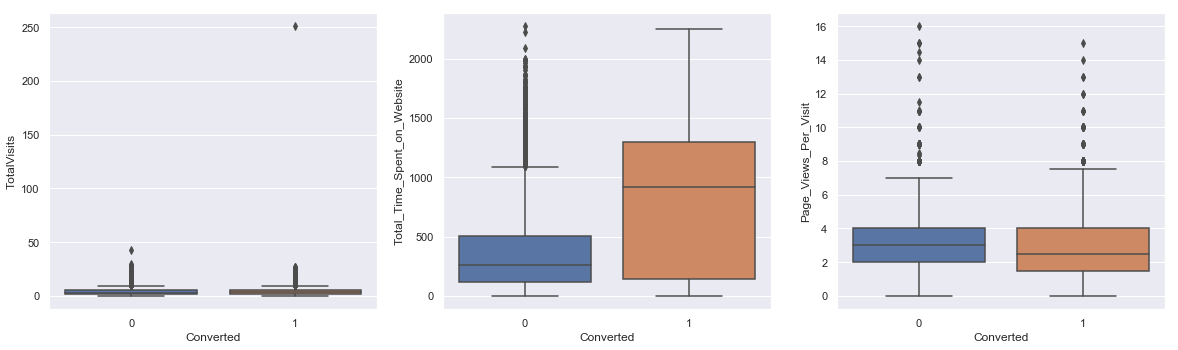

In [1566]:
sns.set(font_scale=1)
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Converted', y = 'TotalVisits', data = leads_data_1)
plt.subplot(2,3,2)
sns.boxplot(x = 'Converted', y = 'Total_Time_Spent_on_Website', data = leads_data_1)
plt.subplot(2,3,3)
sns.boxplot(x = 'Converted', y = 'Page_Views_Per_Visit', data = leads_data_1)


We will remove the outliers and plot again.

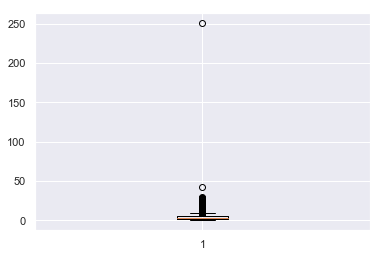

In [1567]:
# outlier treatment for TotalVisits
sns.set(font_scale = 1)
plt.boxplot(leads_data_1.TotalVisits)
Q1 = leads_data_1.TotalVisits.quantile(0.25)
Q3 = leads_data_1.TotalVisits.quantile(0.75)
IQR = Q3 - Q1
leads_data_1_TotalVisits_outliers = leads_data_1[(leads_data_1.TotalVisits < Q1 - 1.5*IQR) | (leads_data_1.TotalVisits > Q3 + 1.5*IQR)]
leads_data_1 = leads_data_1[(leads_data_1.TotalVisits >= Q1 - 1.5*IQR) & (leads_data_1.TotalVisits <= Q3 + 1.5*IQR)]

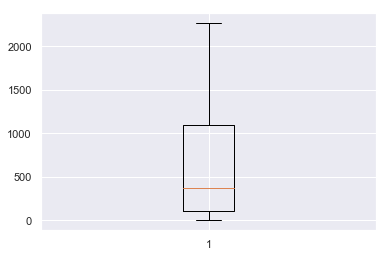

In [1568]:
# outlier treatment for Total_Time_Spent_on_Website
sns.set(font_scale = 1)
plt.boxplot(leads_data_1.Total_Time_Spent_on_Website)
Q1 = leads_data_1.Total_Time_Spent_on_Website.quantile(0.25)
Q3 = leads_data_1.Total_Time_Spent_on_Website.quantile(0.75)
IQR = Q3 - Q1
leads_data_1_Total_Time_Spent_on_Website_outliers = leads_data_1[(leads_data_1.Total_Time_Spent_on_Website < Q1 - 1.5*IQR) | (leads_data_1.Total_Time_Spent_on_Website > Q3 + 1.5*IQR)]
leads_data_1 = leads_data_1[(leads_data_1.Total_Time_Spent_on_Website >= Q1 - 1.5*IQR) & (leads_data_1.Total_Time_Spent_on_Website <= Q3 + 1.5*IQR)]

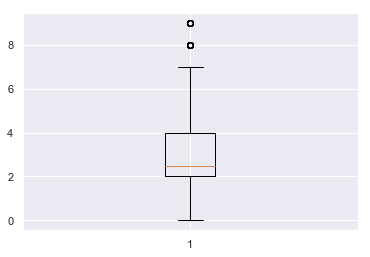

In [1569]:
# outlier treatment for Page_Views_Per_Visit
sns.set(font_scale = 1)
plt.boxplot(leads_data_1.Page_Views_Per_Visit)
Q1 = leads_data_1.Page_Views_Per_Visit.quantile(0.25)
Q3 = leads_data_1.Page_Views_Per_Visit.quantile(0.75)
IQR = Q3 - Q1
leads_data_1_Page_Views_Per_Visit_outliers = leads_data_1[(leads_data_1.Page_Views_Per_Visit < Q1 - 1.5*IQR) | (leads_data_1.Page_Views_Per_Visit > Q3 + 1.5*IQR)]
leads_data_1 = leads_data_1[(leads_data_1.Page_Views_Per_Visit >= Q1 - 1.5*IQR) & (leads_data_1.Page_Views_Per_Visit <= Q3 + 1.5*IQR)]

Plotting the graph again

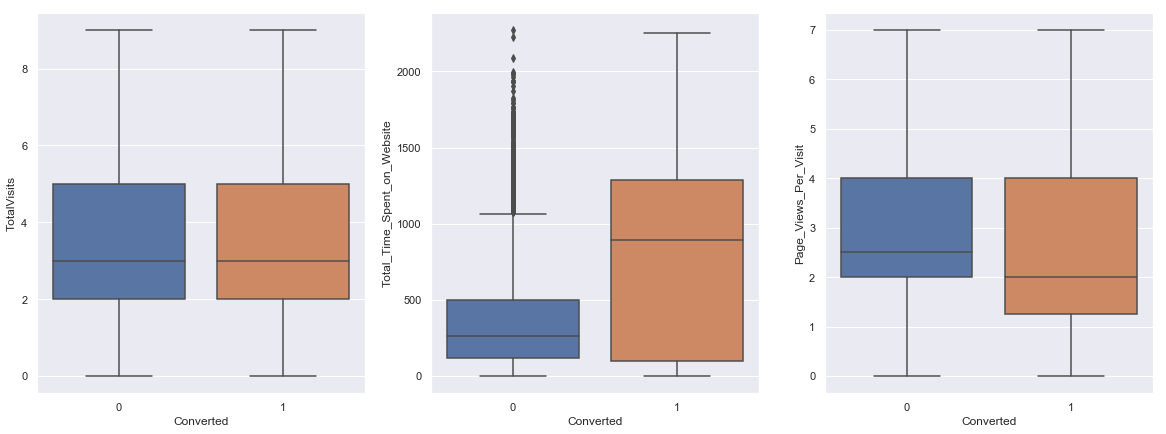

In [1570]:
plt.figure(figsize=(20, 7))
plt.subplot(1,3,1)
sns.boxplot(x = 'Converted', y = 'TotalVisits', data = leads_data_1)
plt.subplot(1,3,2)
sns.boxplot(x = 'Converted', y = 'Total_Time_Spent_on_Website', data = leads_data_1)
plt.subplot(1,3,3)
sns.boxplot(x = 'Converted', y = 'Page_Views_Per_Visit', data = leads_data_1)

Out of the 3 numerical variables TotalVisits and Page_Views_Per_visit doesnt show much effect on conversion rate, but Total_Time_Spent_on_Website seems to have an impact on coversion rate with more time spend leading to more likelier conversion.

C:\Users\Isha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


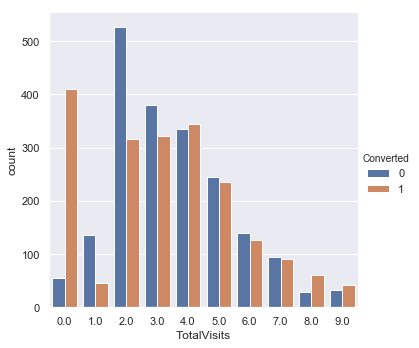

In [1571]:
#plt.figure(figsize=(20, 7))
sns.factorplot(x = "TotalVisits", hue = "Converted", data = leads_data_1, kind = "count") #, aspect =3


C:\Users\Isha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


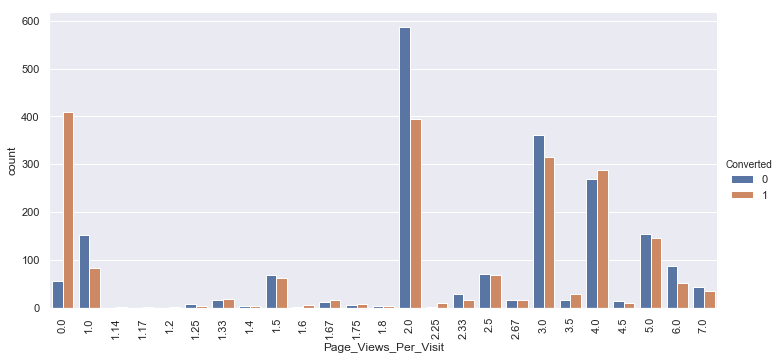

In [1572]:
g = sns.factorplot(x = "Page_Views_Per_Visit", hue = "Converted", data = leads_data_1, kind = "count", aspect =2) 
g.set_xticklabels(rotation=90)

Now we will check for Categorical variables against converted

C:\Users\Isha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


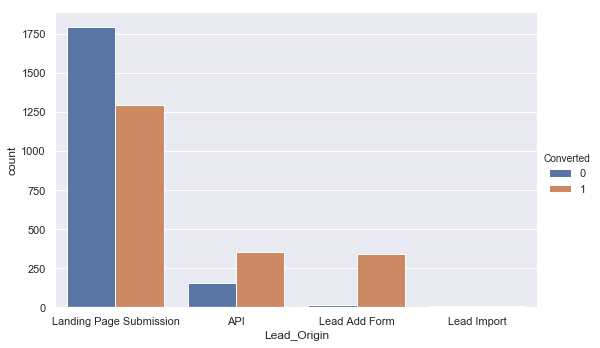

In [1573]:
sns.factorplot(x = "Lead_Origin", hue = "Converted", data = leads_data_1, kind = "count", aspect =1.5)


C:\Users\Isha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


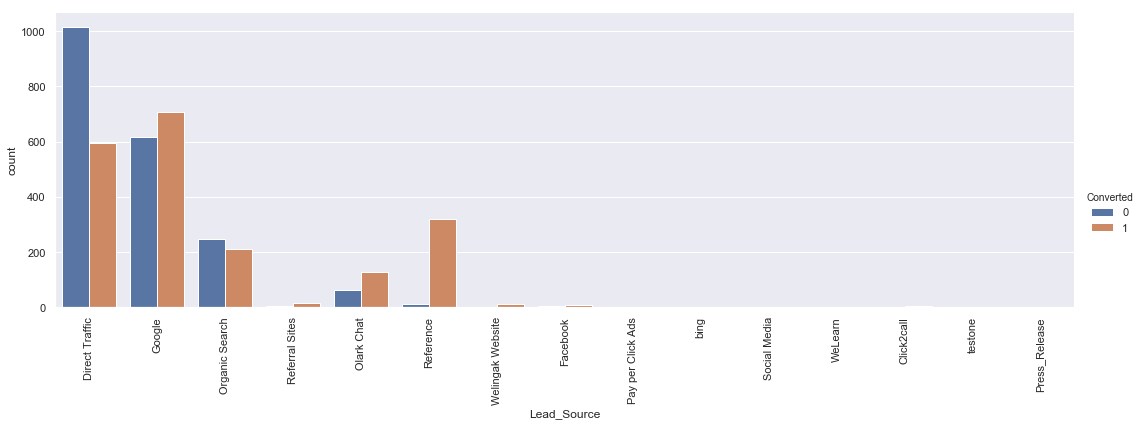

In [1574]:
#plt.figure(figsize=(20, 7))
g = sns.factorplot(x = "Lead_Source", hue = "Converted", data = leads_data_1, kind = "count", aspect =3)
g.set_xticklabels(rotation=90)

C:\Users\Isha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


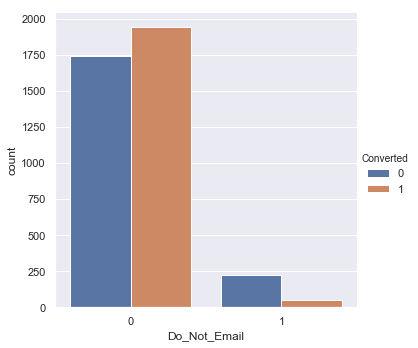

In [1575]:
sns.factorplot(x = "Do_Not_Email", hue = "Converted", data = leads_data_1, kind = "count")#, aspect =3.5)

C:\Users\Isha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


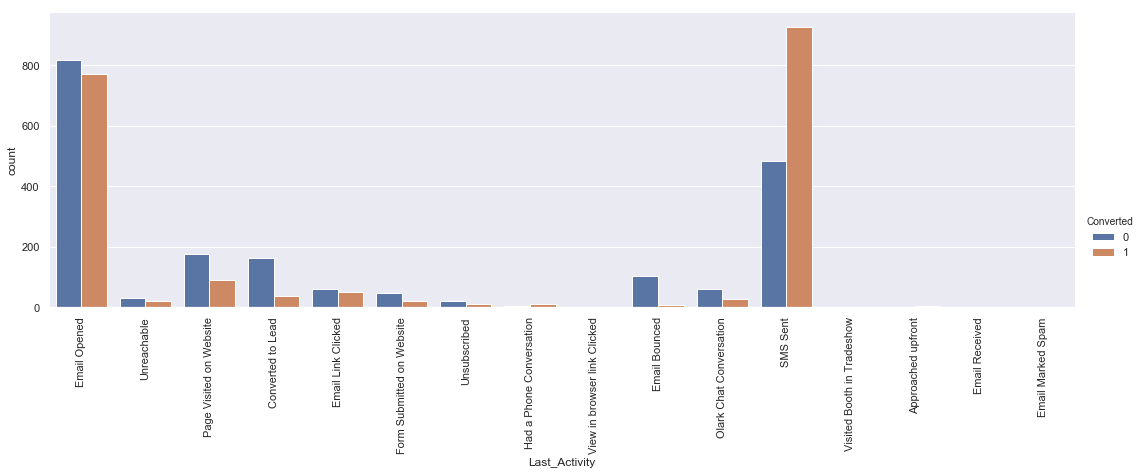

In [1576]:
#plt.figure(figsize=(50, 20))
#plt.xticks(rotation=90)
g = sns.factorplot(x = "Last_Activity", hue = "Converted", data = leads_data_1, kind = "count", aspect =3)
g.set_xticklabels(rotation=90)


C:\Users\Isha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


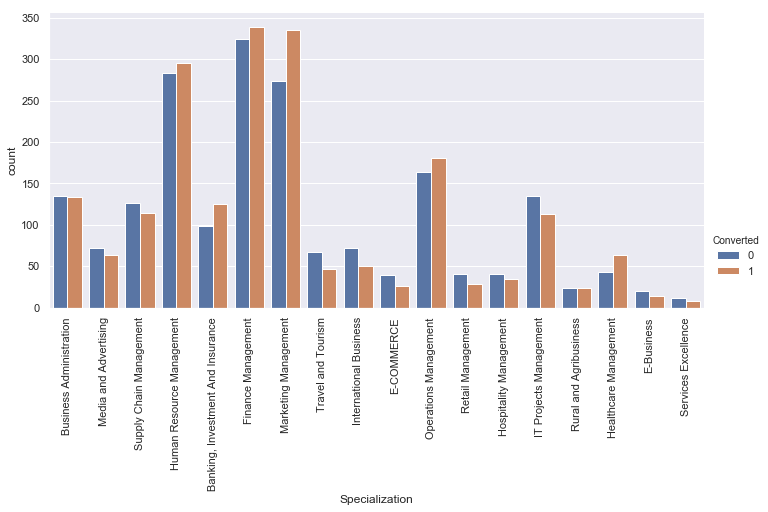

In [1577]:
#plt.figure(figsize=(50, 20))
#plt.xticks(rotation=90)
g = sns.factorplot(x = "Specialization", hue = "Converted", data = leads_data_1, kind = "count", aspect =2)
g.set_xticklabels(rotation=90)


C:\Users\Isha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


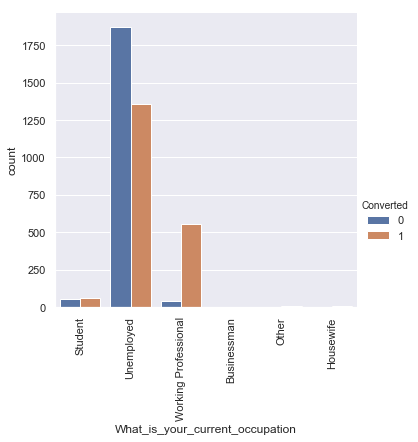

In [1578]:
#plt.figure(figsize=(50, 20))
#plt.xticks(rotation=90)
g = sns.factorplot(x = "What_is_your_current_occupation", hue = "Converted", data = leads_data_1, kind = "count")
g.set_xticklabels(rotation=90)


C:\Users\Isha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


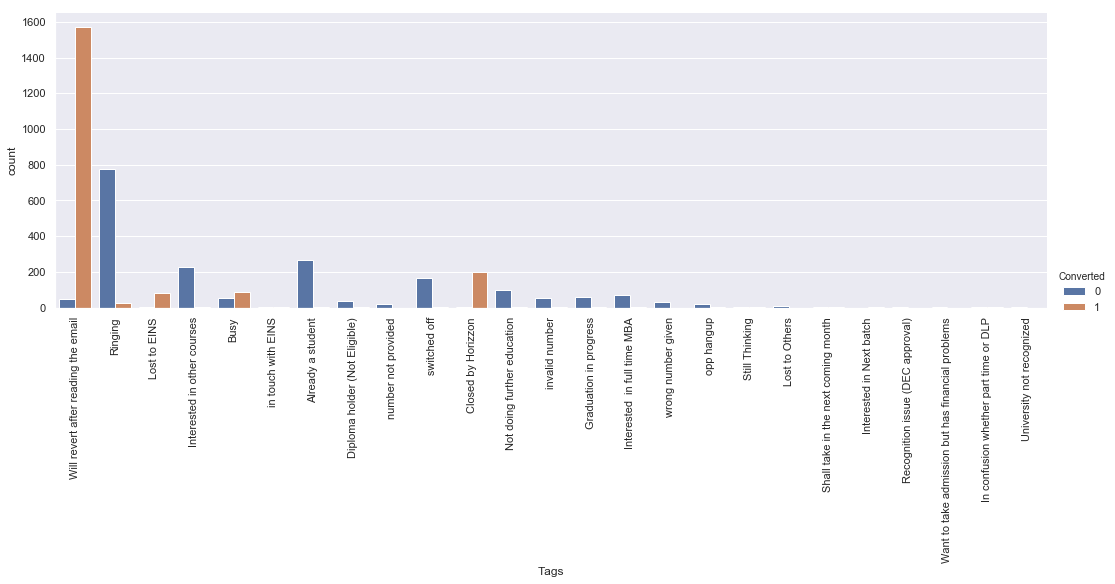

In [1579]:
#plt.figure(figsize=(50, 20))
#plt.xticks(rotation=90)
g = sns.factorplot(x = "Tags", hue = "Converted", data = leads_data_1, kind = "count", aspect = 3)
g.set_xticklabels(rotation=90)


C:\Users\Isha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


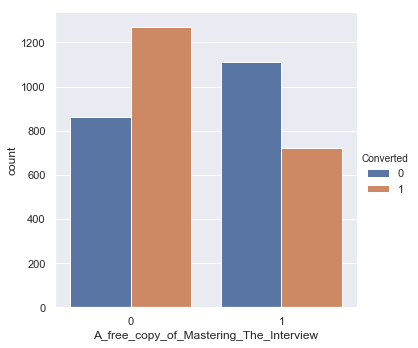

In [1580]:
#plt.figure(figsize=(50, 20))
#plt.xticks(rotation=90)
g = sns.factorplot(x = "A_free_copy_of_Mastering_The_Interview", hue = "Converted", data = leads_data_1, kind = "count")#, aspect = 3)
#g.set_xticklabels(rotation=90)


C:\Users\Isha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


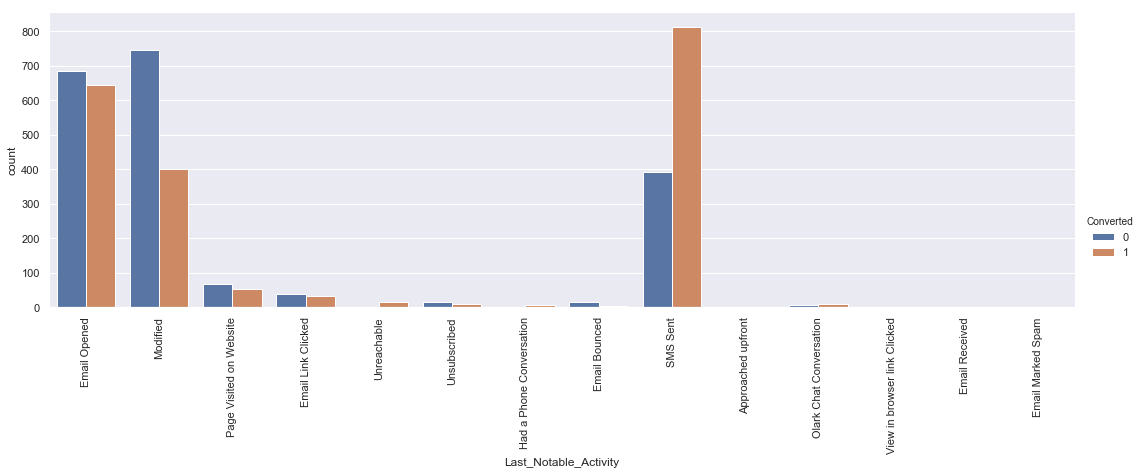

In [1581]:
#plt.figure(figsize=(50, 20))
#plt.xticks(rotation=90)
g = sns.factorplot(x = "Last_Notable_Activity", hue = "Converted", data = leads_data_1, kind = "count", aspect = 3)
g.set_xticklabels(rotation=90)


In [1582]:
leads_data_1.head(2)

Prospect_ID  Lead_Number              Lead_Origin  \
0  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
1  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   

      Lead_Source  Do_Not_Email  Converted  TotalVisits  \
0  Direct Traffic             0          1          2.0   
1  Direct Traffic             0          0          1.0   

   Total_Time_Spent_on_Website  Page_Views_Per_Visit Last_Activity  \
0                         1532                   2.0  Email Opened   
1                          305                   1.0   Unreachable   

            Specialization What_is_your_current_occupation  \
0  Business Administration                         Student   
1    Media and Advertising                      Unemployed   

                                  Tags  \
0  Will revert after reading the email   
1                              Ringing   

   A_free_copy_of_Mastering_The_Interview Last_Notable_Activity  
0                                       1          Email Opened  
1                                       0              Modified

In [1583]:
leads_data_1.Lead_Origin.value_counts()

Landing Page Submission    3088
API                         512
Lead Add Form               351
Lead Import                  12
Name: Lead_Origin, dtype: int64

In [1584]:
leads_data_1.Lead_Source.value_counts()

Direct Traffic       1611
Google               1323
Organic Search        460
Reference             331
Olark Chat            188
Referral Sites         18
Facebook               12
Welingak Website       10
Click2call              3
Social Media            2
WeLearn                 1
testone                 1
Press_Release           1
Pay per Click Ads       1
bing                    1
Name: Lead_Source, dtype: int64

In [1585]:
leads_data_1.Last_Activity.value_counts()

Email Opened                    1589
SMS Sent                        1410
Page Visited on Website          268
Converted to Lead                202
Email Bounced                    113
Email Link Clicked               112
Olark Chat Conversation           88
Form Submitted on Website         71
Unreachable                       53
Unsubscribed                      32
Had a Phone Conversation          15
Approached upfront                 3
Email Marked Spam                  2
View in browser link Clicked       2
Email Received                     2
Visited Booth in Tradeshow         1
Name: Last_Activity, dtype: int64

In [1586]:
leads_data_1.Specialization.value_counts()

Finance Management                   664
Marketing Management                 609
Human Resource Management            580
Operations Management                345
Business Administration              268
IT Projects Management               248
Supply Chain Management              240
Banking, Investment And Insurance    223
Media and Advertising                135
International Business               122
Travel and Tourism                   114
Healthcare Management                106
Hospitality Management                75
Retail Management                     69
E-COMMERCE                            65
Rural and Agribusiness                47
E-Business                            34
Services Excellence                   19
Name: Specialization, dtype: int64

In [1587]:
leads_data_1.What_is_your_current_occupation.value_counts()

Unemployed              3233
Working Professional     595
Student                  113
Other                     10
Housewife                  9
Businessman                3
Name: What_is_your_current_occupation, dtype: int64

In [1588]:
leads_data_1.Tags.value_counts()

Will revert after reading the email                  1618
Ringing                                               799
Already a student                                     270
Interested in other courses                           230
Closed by Horizzon                                    200
switched off                                          168
Busy                                                  144
Not doing further education                           102
Lost to EINS                                           86
Interested  in full time MBA                           74
Graduation in progress                                 65
invalid number                                         57
Diploma holder (Not Eligible)                          41
wrong number given                                     31
opp hangup                                             25
number not provided                                    20
in touch with EINS                                      7
Lost to Others

In [1589]:
leads_data_1.Last_Notable_Activity.value_counts()

Email Opened                    1329
SMS Sent                        1206
Modified                        1145
Page Visited on Website          119
Email Link Clicked                72
Unsubscribed                      25
Email Bounced                     21
Unreachable                       17
Olark Chat Conversation           16
Had a Phone Conversation           8
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: Last_Notable_Activity, dtype: int64

#### Now we will create dummy variables for the below categorical variables.
Lead_Origin, Lead_Source, Last_Activity, Specialization, What_is_your_current_occupation, Tags, Last_Notable_Activity

In [1590]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_data_1[['Lead_Origin', 'Lead_Source', 'Last_Activity', 'Specialization', 'What_is_your_current_occupation', 'Tags', 'Last_Notable_Activity']], drop_first=True)

# Adding the results to the master dataframe
leads_data_1 = pd.concat([leads_data_1, dummy1], axis=1)

Dropping the old columns once dummies are created.

In [1591]:
leads_data_1.drop(['Lead_Origin', 'Lead_Source', 'Last_Activity', 'Specialization', 'What_is_your_current_occupation', 'Tags', 'Last_Notable_Activity'],axis=1,inplace=True)

#### Looking for correlations

In [1592]:
leads_data_1.shape

(3963, 99)

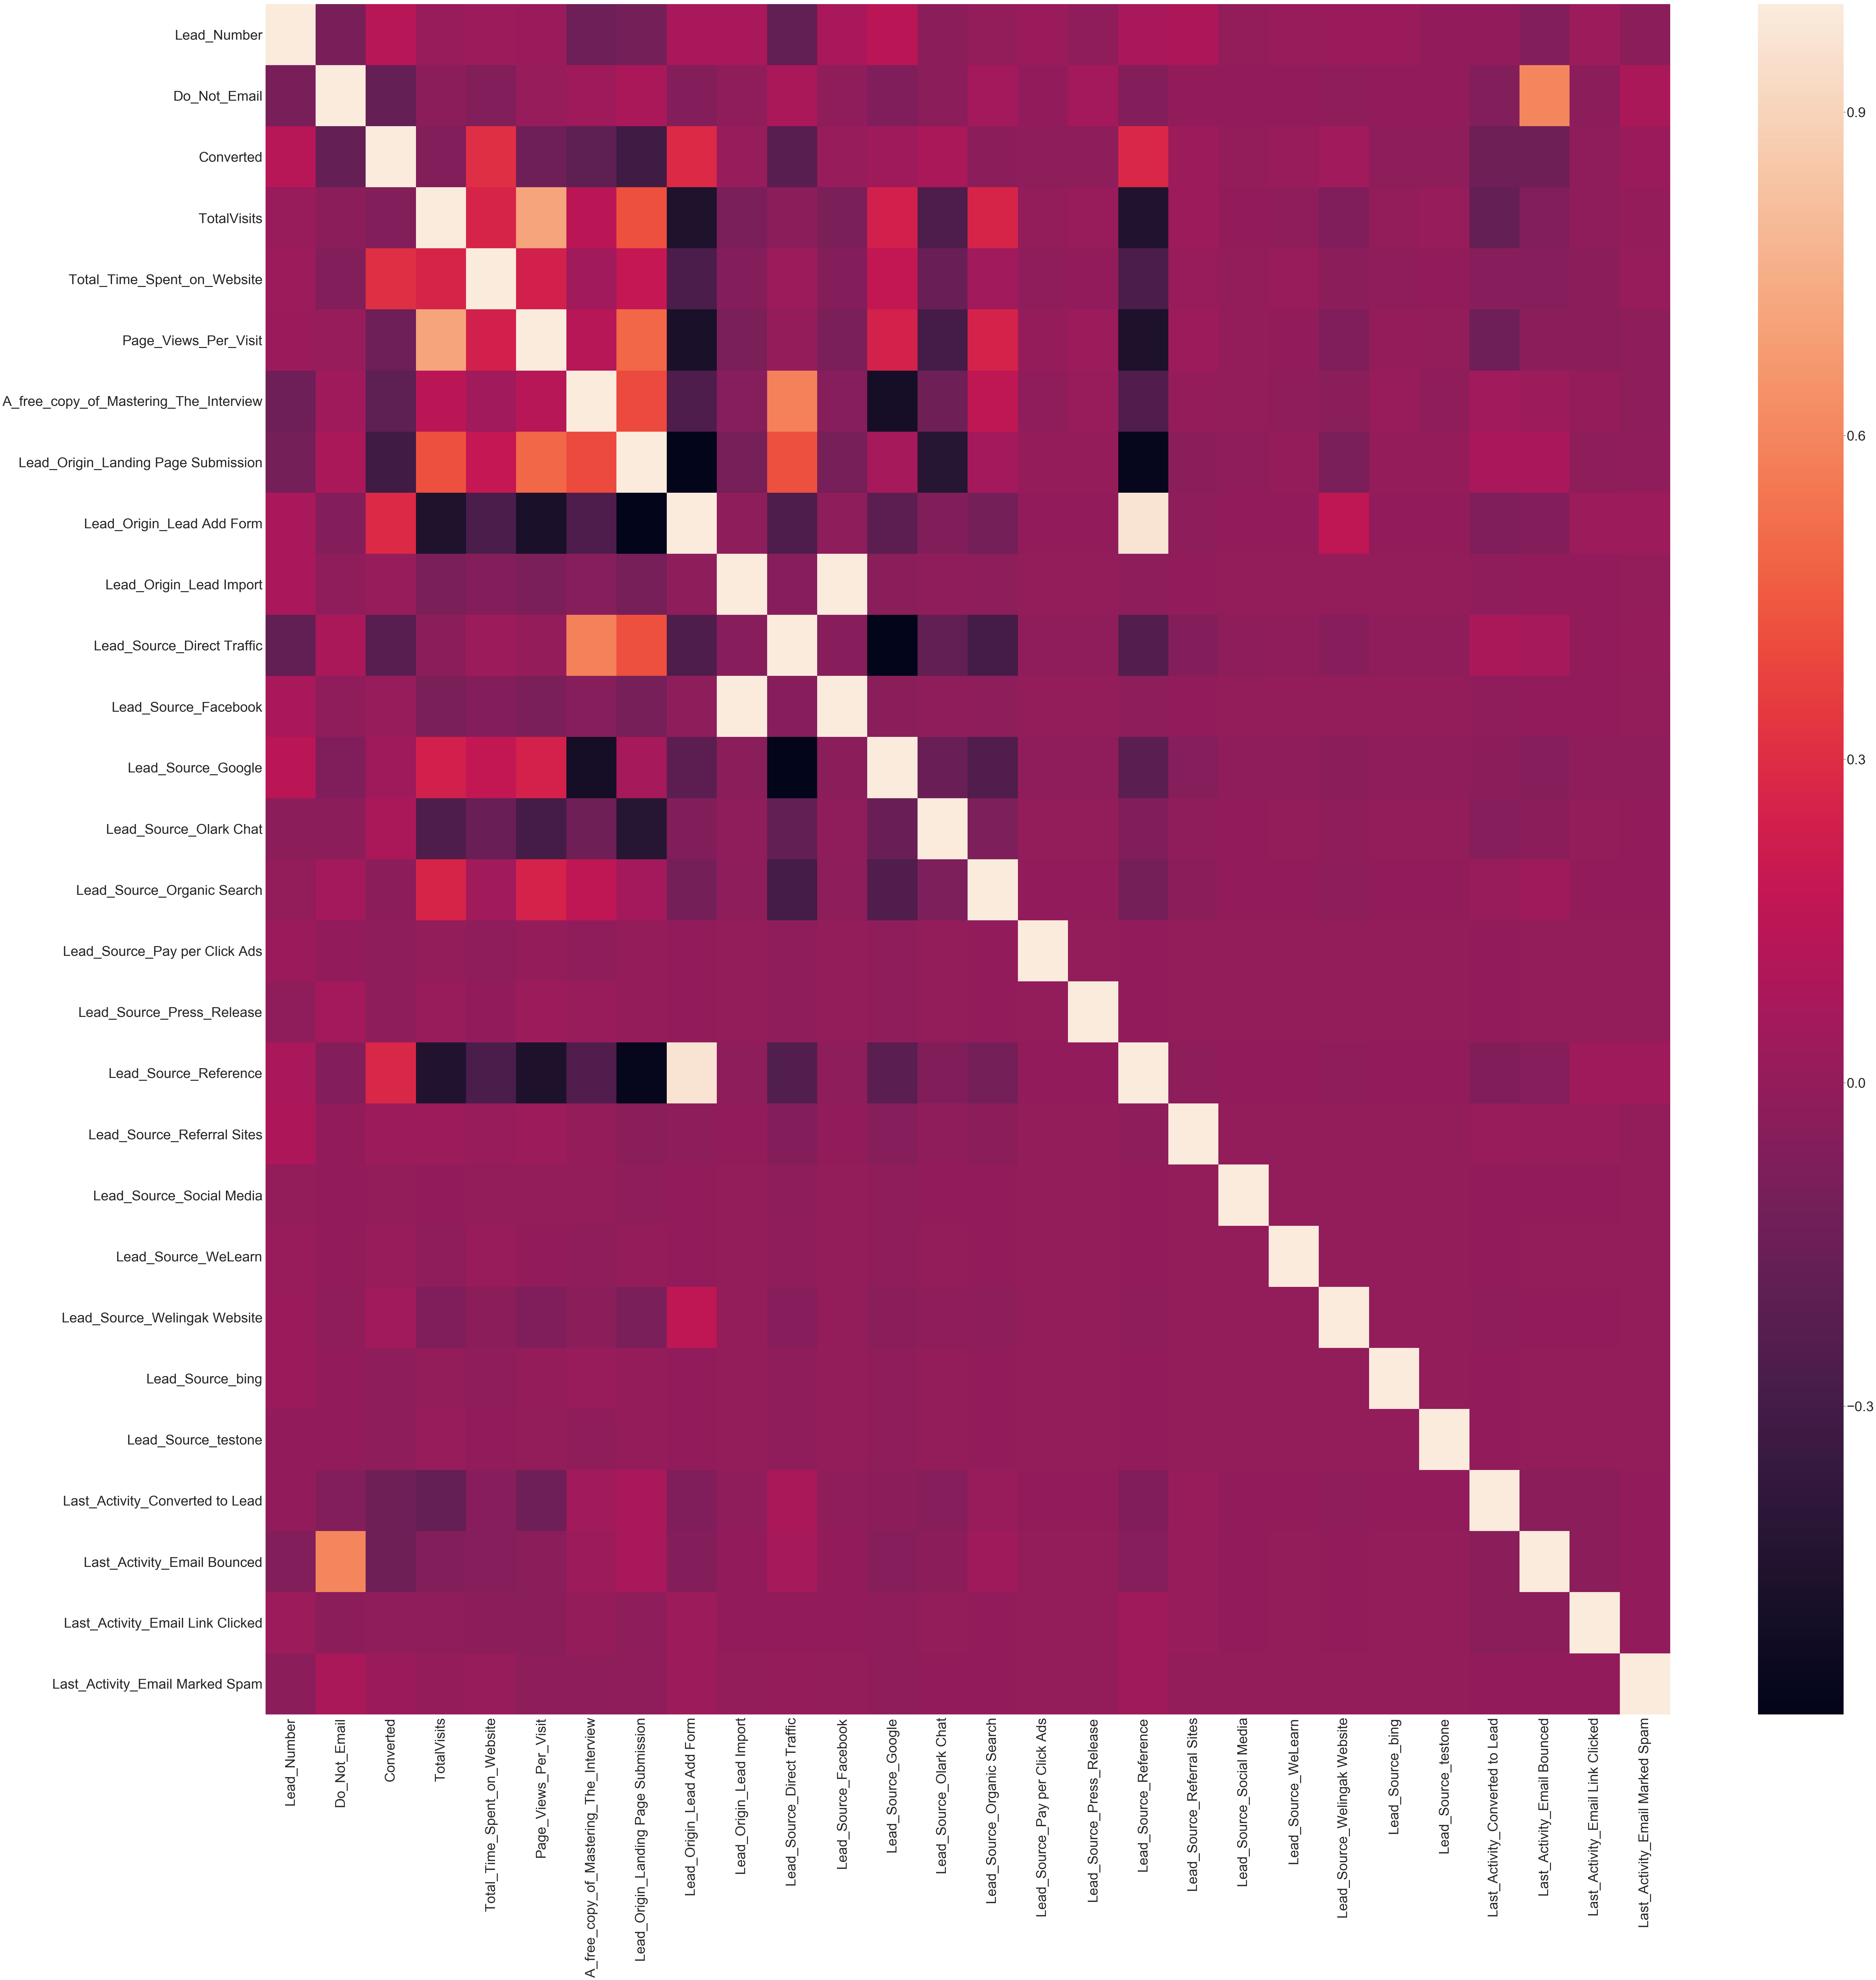

In [1593]:
# Let's see the correlation matrix 
plt.figure(figsize = (100,100))        # Size of the figure
sns.set(font_scale=4)
corrmat = leads_data_1.iloc[:,0:29].corr()
sns.heatmap(leads_data_1.iloc[:,0:29].corr())
plt.show()

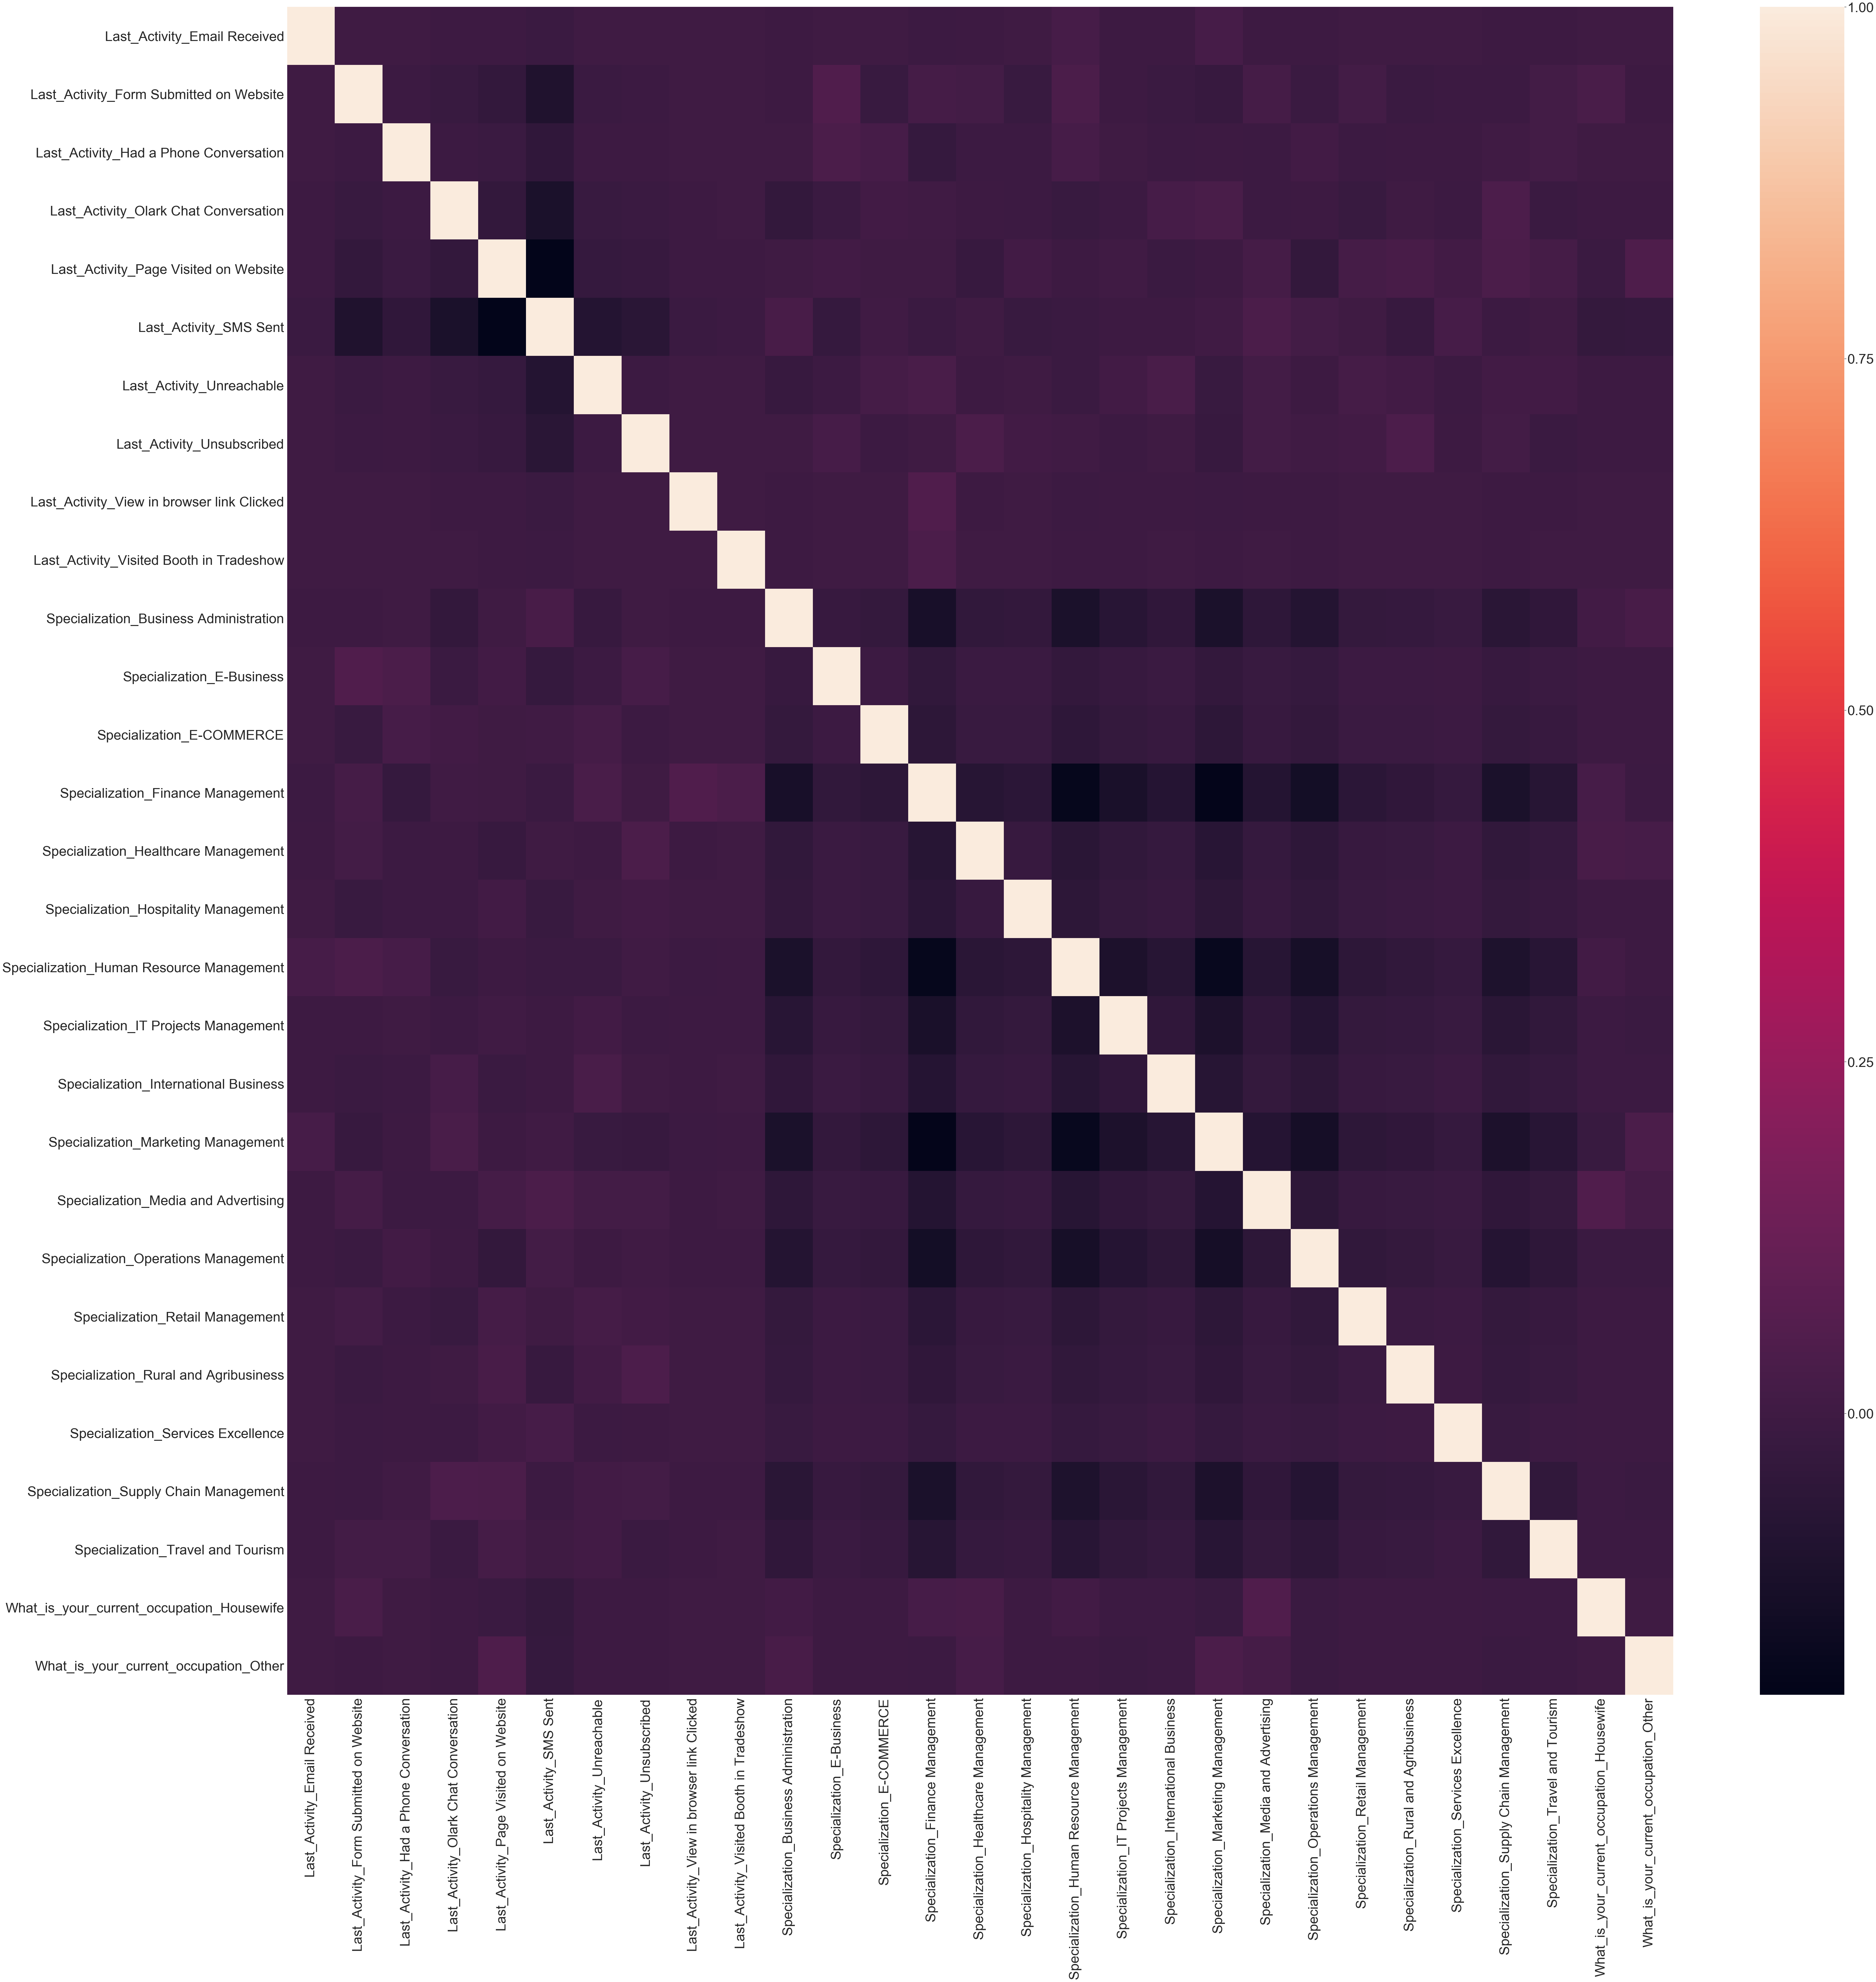

In [1594]:
# Let's see the correlation matrix 
plt.figure(figsize = (100,100))        # Size of the figure
sns.set(font_scale=4)
corrmat = leads_data_1.iloc[:,30:59].corr()
sns.heatmap(leads_data_1.iloc[:,30:59].corr())
plt.show()

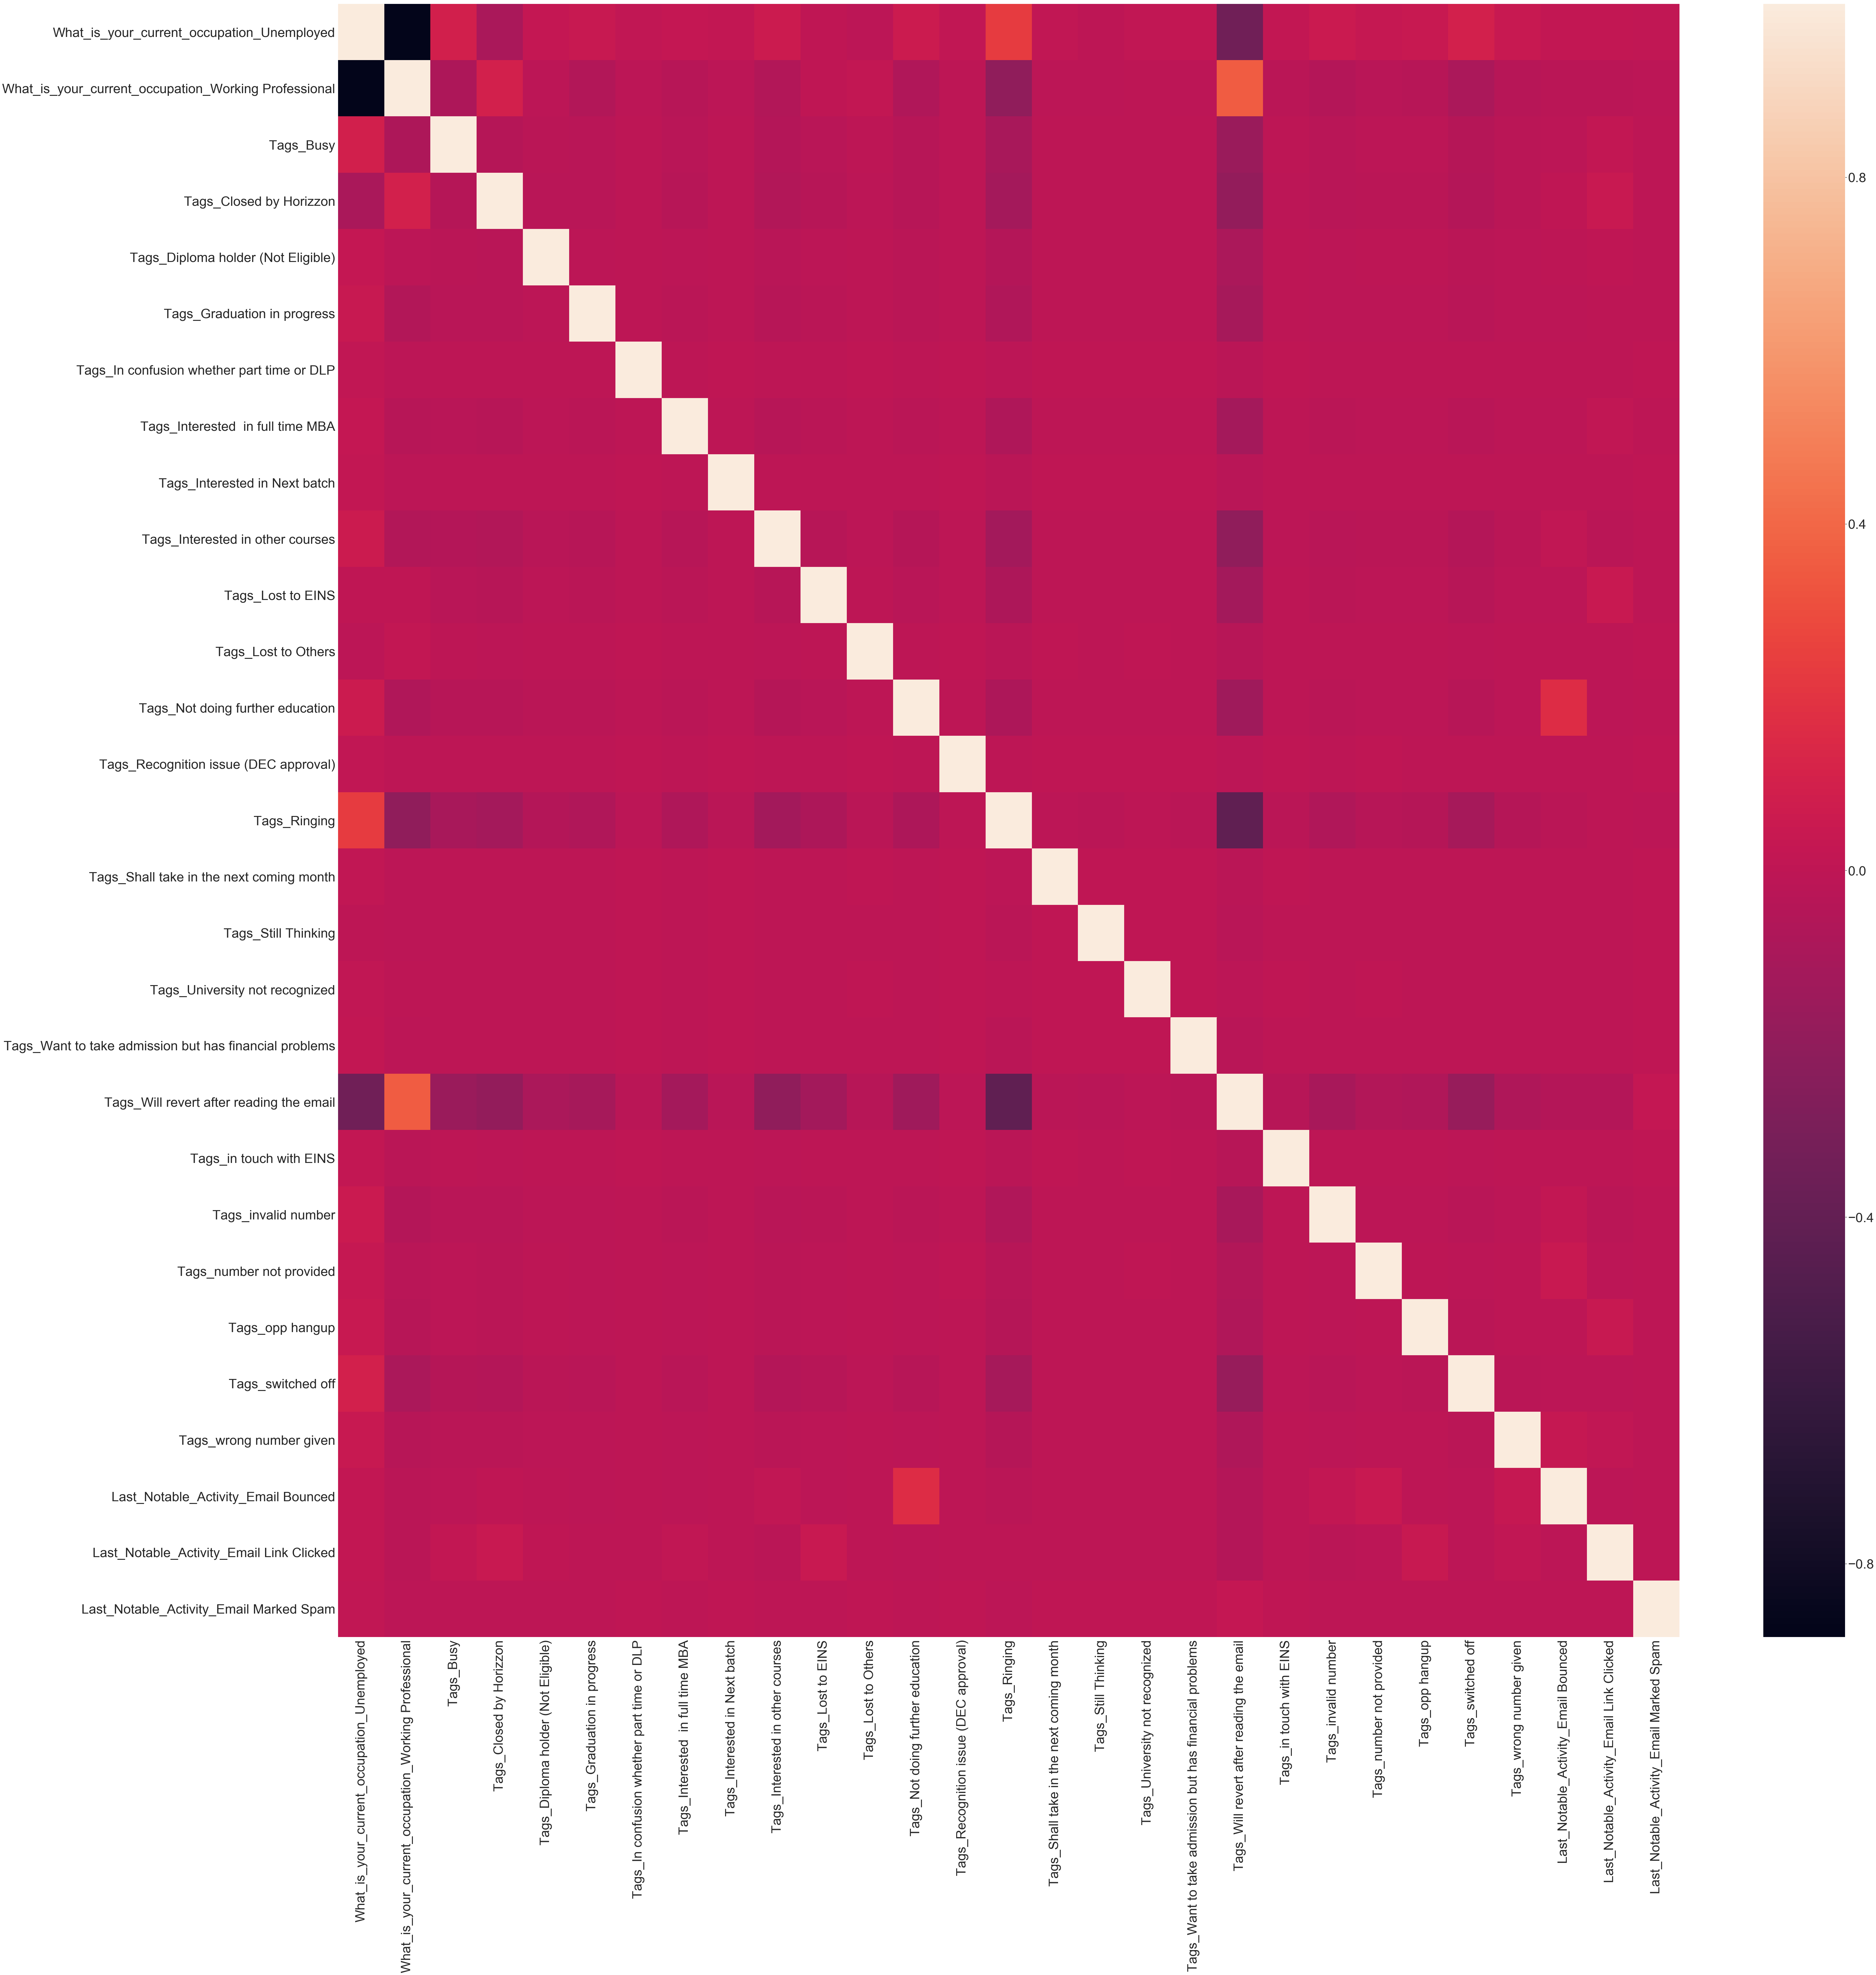

In [1595]:
# Let's see the correlation matrix 
plt.figure(figsize = (100,100))        # Size of the figure
sns.set(font_scale=4)
corrmat = leads_data_1.iloc[:,60:89].corr()
sns.heatmap(leads_data_1.iloc[:,60:89].corr())
plt.show()

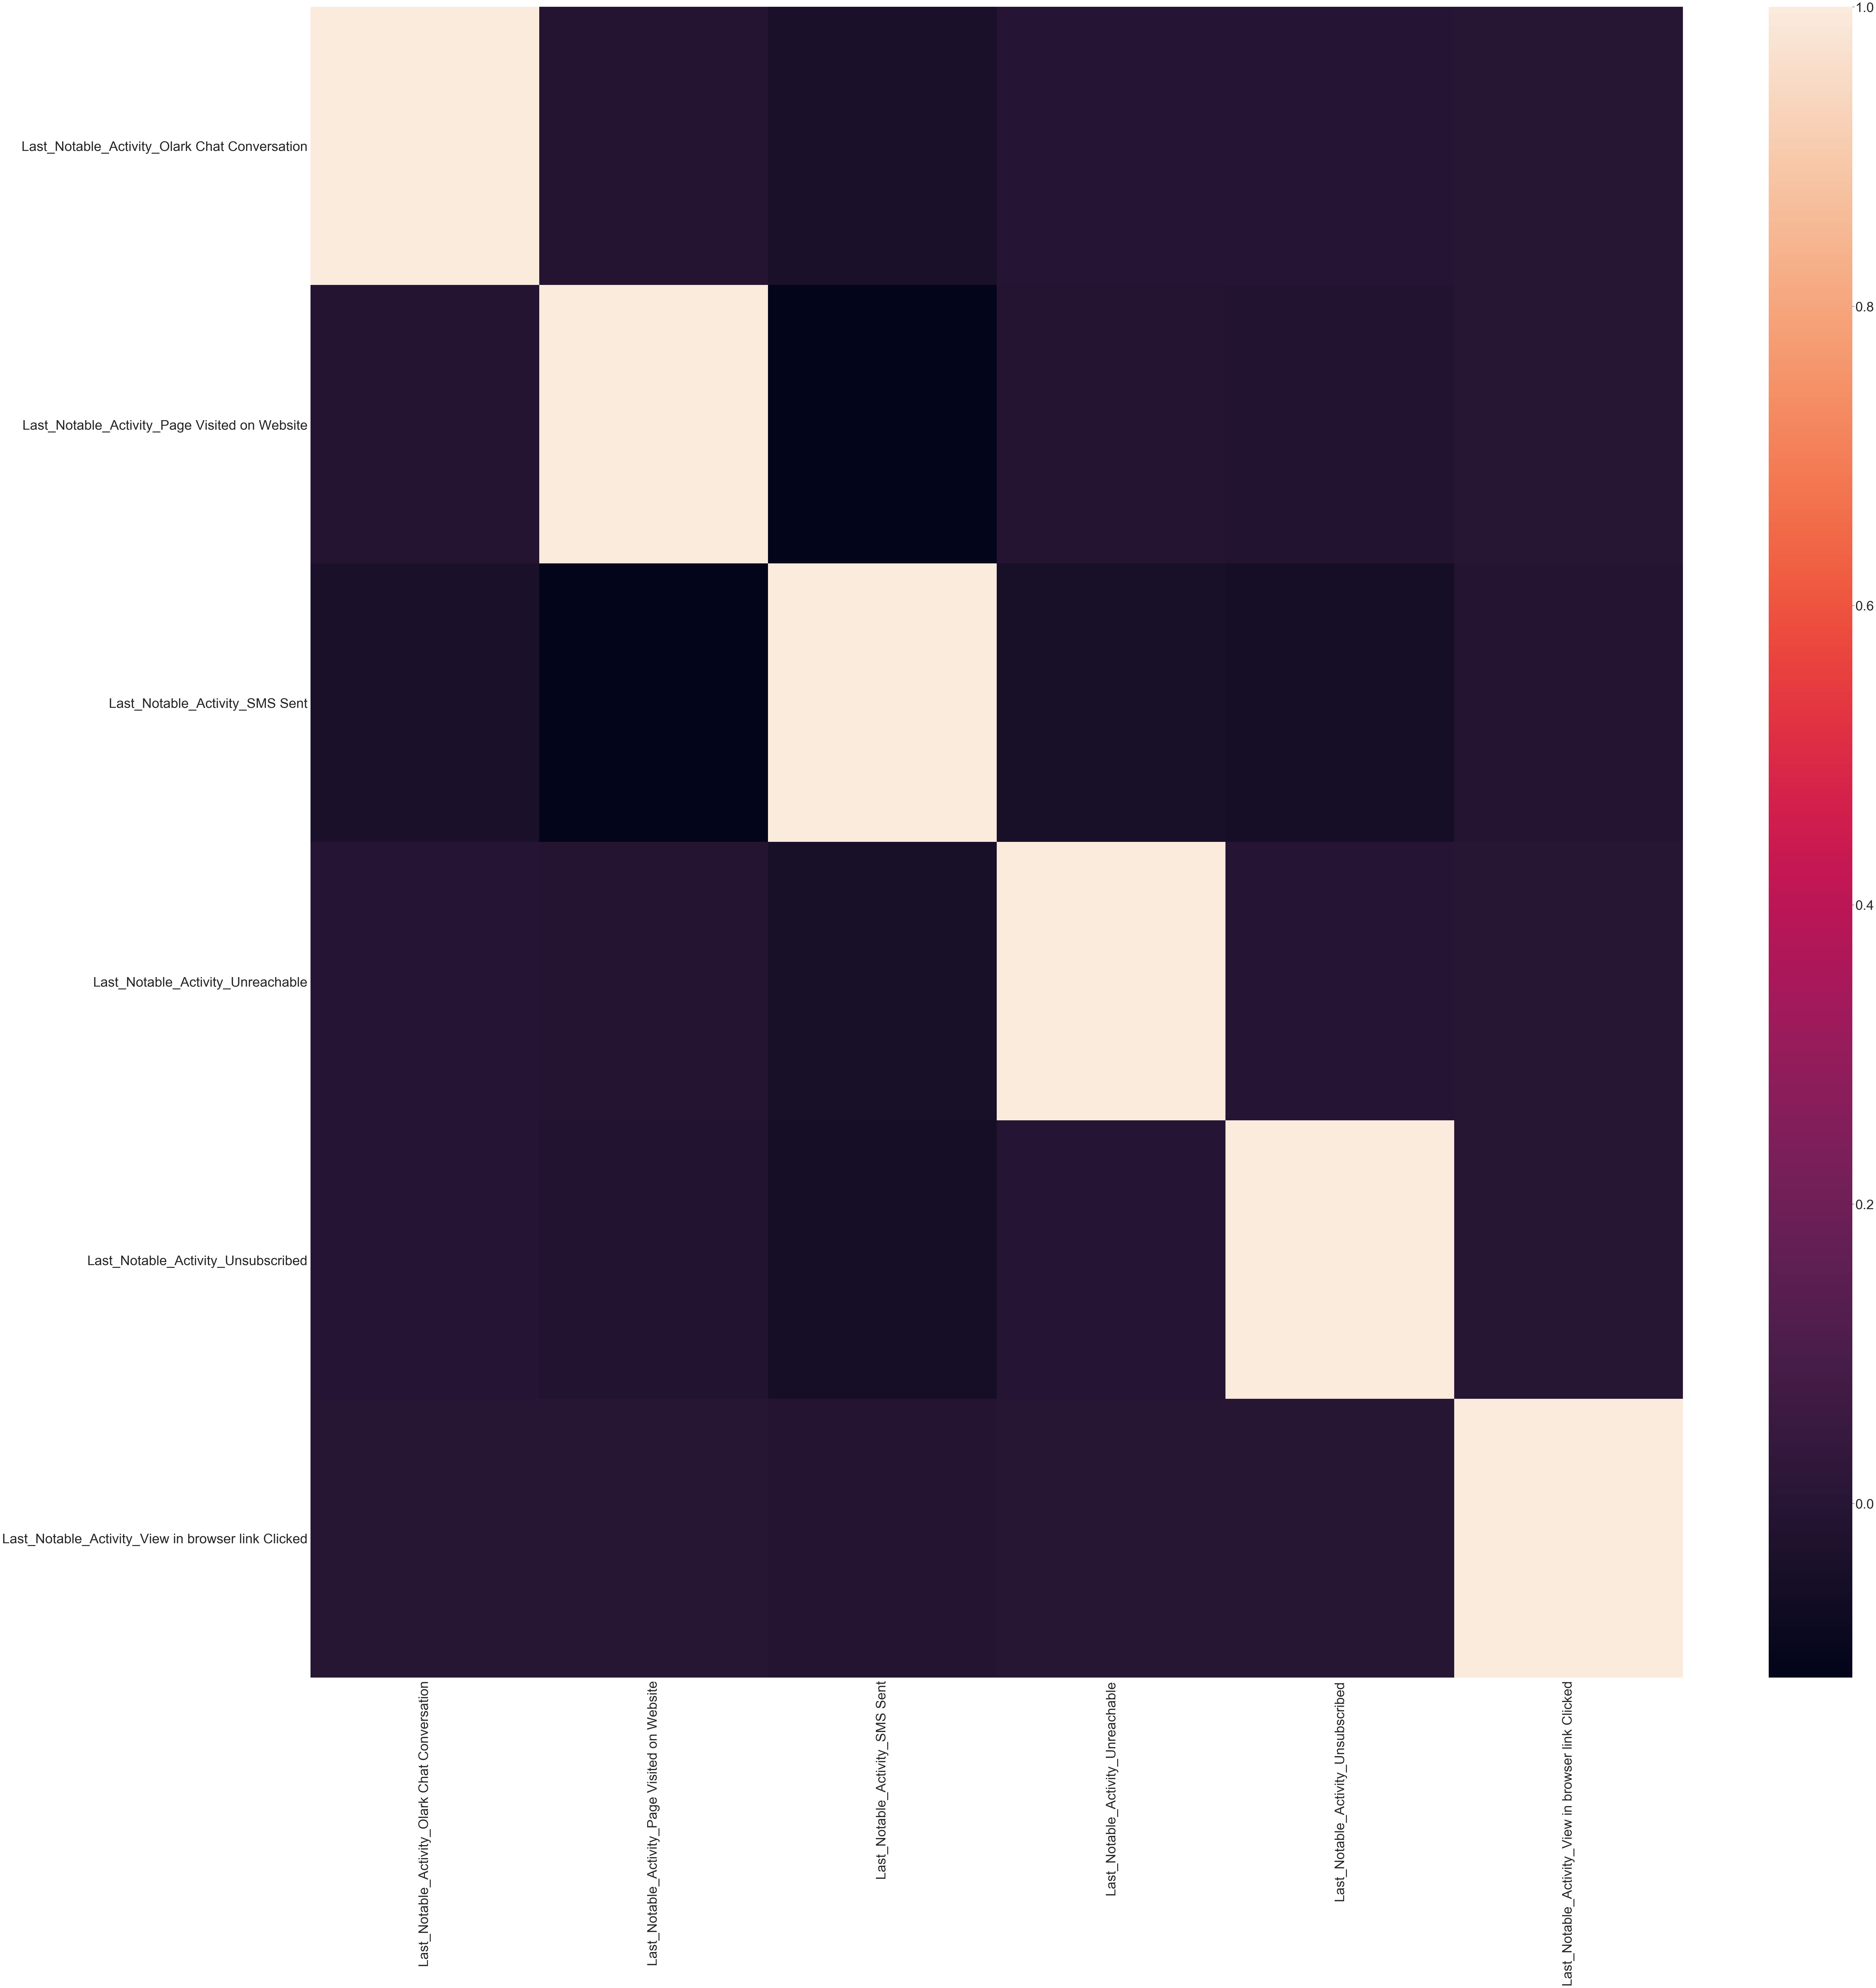

In [1596]:
# Let's see the correlation matrix 
plt.figure(figsize = (100,100))        # Size of the figure
sns.set(font_scale=4)
corrmat = leads_data_2.iloc[:,90:99].corr()
sns.heatmap(leads_data_2.iloc[:,90:99].corr())
plt.show()

In [1597]:
sns.set(font_scale=1)

Since there are huge no of categories added due to Tags,Specializations we are not able to make sense of this diagram.
Hence split it into subdiagrams.
Dropping columns Lead_Source_Reference, Lead_Source_Facebook which are correlated to other variables.

In [1598]:
leads_data_1.drop(['Lead_Source_Reference', 'Lead_Source_Facebook'],axis=1,inplace=True)


#### Now the test-train split.

In [1599]:
from sklearn.model_selection import train_test_split

In [1600]:
# Putting feature variable to X
X = leads_data_1.drop(['Converted','Prospect_ID','Lead_Number'], axis=1)

X.head()

Do_Not_Email  TotalVisits  Total_Time_Spent_on_Website  \
0             0          2.0                         1532   
1             0          1.0                          305   
2             0          2.0                         1640   
4             0          8.0                         1343   
6             0          5.0                          170   

   Page_Views_Per_Visit  A_free_copy_of_Mastering_The_Interview  \
0                  2.00                                       1   
1                  1.00                                       0   
2                  2.00                                       0   
4                  2.67                                       1   
6                  5.00                                       1   

   Lead_Origin_Landing Page Submission  Lead_Origin_Lead Add Form  \
0                                    1                          0   
1                                    1                          0   
2                                    1                          0   
4                                    1                          0   
6                                    1                          0   

   Lead_Origin_Lead Import  Lead_Source_Direct Traffic  Lead_Source_Google  \
0                        0                           1                   0   
1                        0                           1                   0   
2                        0                           0                   1   
4                        0                           1                   0   
6                        0                           0                   0   

   Lead_Source_Olark Chat  Lead_Source_Organic Search  \
0                       0                           0   
1                       0                           0   
2                       0                           0   
4                       0                           0   
6                       0                           1   

   Lead_Source_Pay per Click Ads  Lead_Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
4                              0                          0   
6                              0                          0   

   Lead_Source_Referral Sites  Lead_Source_Social Media  Lead_Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
4                           0                         0                    0   
6                           0                         0                    0   

   Lead_Source_Welingak Website  Lead_Source_bing  Lead_Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
4                             0                 0                    0   
6                             0                 0                    0   

   Last_Activity_Converted to Lead  Last_Activity_Email Bounced  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
4                                0                            0   
6                                0                            0   

   Last_Activity_Email Link Clicked  Last_Activity_Email Marked Spam  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
4         

In [1601]:
# Putting response variable to y
y = leads_data_1['Converted']

y.head()

0    1
1    0
2    1
4    1
6    0
Name: Converted, dtype: int64

In [1602]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [1603]:
from sklearn.preprocessing import StandardScaler

In [1604]:
scaler = StandardScaler()

X_train[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']])

X_train.head()

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Do_Not_Email  TotalVisits  Total_Time_Spent_on_Website  \
3595             0     1.224103                     1.789886   
620              0     0.292125                     1.186706   
3520             0     0.292125                     1.595312   
753              0    -0.639853                    -0.973065   
288              0     2.156081                     0.967368   

      Page_Views_Per_Visit  A_free_copy_of_Mastering_The_Interview  \
3595             -0.697287                                       0   
620               0.829727                                       0   
3520             -0.391884                                       0   
753              -0.391884                                       0   
288               0.829727                                       1   

      Lead_Origin_Landing Page Submission  Lead_Origin_Lead Add Form  \
3595                                    1                          0   
620                                     0                          0   
3520                                    1                          0   
753                                     1                          0   
288                                     1                          0   

      Lead_Origin_Lead Import  Lead_Source_Direct Traffic  Lead_Source_Google  \
3595                        0                           1                   0   
620                         0                           0                   1   
3520                        0                           1                   0   
753                         0                           0                   1   
288                         0                           0                   1   

      Lead_Source_Olark Chat  Lead_Source_Organic Search  \
3595                       0                           0   
620                        0                           0   
3520                       0                           0   
753                        0                           0   
288                        0                           0   

      Lead_Source_Pay per Click Ads  Lead_Source_Press_Release  \
3595                              0                          0   
620                               0                          0   
3520                              0                          0   
753                               0                          0   
288                               0                          0   

      Lead_Source_Referral Sites  Lead_Source_Social Media  \
3595                           0                         0   
620                            0                         0   
3520                           0                         0   
753                            0                         0   
288                            0                         0   

      Lead_Source_WeLearn  Lead_Source_Welingak Website  Lead_Source_bing  \
3595                    0                             0                 0   
620                     0                             0                 0   
3520                    0                             0                 0   
753                     0                             0                 0   
288                     0                             0                 0   

      Lead_Source_testone  Last_Activity_Converted to Lead  \
3595                    0                                0   
620                     0                                0   
3520                    0                                0   
753                     0                                0   
288                     0                                0   

      Last_Activity_Email Bounced  Last_Activity_Email Link Clicked  \
3595                            0                                 0   
620                             0                                 0   
3520                            0                                 0   
753                          

In [1605]:
### Checking the Conversion Rate
convertion_rate = (sum(leads_data_1['Converted'])/len(leads_data_1['Converted'].index))*100
convertion_rate

50.29018420388594

We have almost 50% conversion rate

#### Model Building

In [1606]:
import statsmodels.api as sm

In [1607]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\Isha\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Isha\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Isha\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Isha\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Isha\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\Isha\Anaconda3\lib\site-packages\statsm

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2774
Model:                            GLM   Df Residuals:                     2684
Model Family:                Binomial   Df Model:                           89
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        21:19:16   Pearson chi2:                 6.94e+17
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   3.002e+15   8.87e+07   3.39e+07      0.000       3e+15       3e+15
Do_Not_Email                                           -4.372e+14   7.13e+06  -6.13e+07      0.000   -4.37e+14   -4.37e+14
TotalVisits                                             2.195e+13   2.02e+06   1.09e+07      0.000     2.2e+13     2.2e+13
Total_Time_Spent_on_Website                              1.48e+14   1.51e+06   9.78e+07      0.000    1.48e+14    1.48e+14
Page_Views_Per_Visit                                   -4.025e+12   2.03e+06  -1.98e+06      0.000   -4.03e+12   -4.03e+12
A_free_copy_of_Mastering_The_Interview                  1.529e+11   3.67e+06   4.17e+04      0.000    1.53e+11    1.53e+11
Lead_Origin_Landing Page Submission                       8.5e+12   5.18e+06   1.64e+06      0.000     8.5e+12     8.5e+12
Lead_Origin_Lead Add Form                               4.252e+15    3.1e+07   1.37e+08      0.000    4.25e+15    4.25e+15
Lead_Origin_Lead Import                                 5.837e+15   3.87e+07   1.51e+08      0.000    5.84e+15    5.84e+15
Lead_Source_Direct Traffic                              4.128e+15    3.1e+07   1.33e+08      0.000    4.13e+15    4.13e+15
Lead_Source_Google                                      4.119e+15   3.07e+07   1.34e+08      0.000    4.12e+15    4.12e+15
Lead_Source_Olark Chat                                  4.206e+15   3.19e+07   1.32e+08      0.000    4.21e+15    4.21e+15
Lead_Source_Organic Search                              4.137e+15   3.11e+07   1.33e+08      0.000    4.14e+15    4.14e+15
Lead_Source_Pay per Click Ads                           1.634e+14   7.41e+07   2.21e+06      0.000    1.63e+14    1.63e+14
Lead_Source_Press_Release                                 21.1735    1.2e-06   1.76e+07      0.000      21.173      21.173
Lead_Source_Referral Sites                              4.185e+15   3.63e+07   1.15e+08      0.000    4.18e+15    4.18e+15
Lead_Source_Social Media                                4.209e+15   5.72e+07   7.36e+07      0.000    4.21e+15    4.21e+15
Lead_Source_WeLearn                                     3.662e+15    7.4e+07   4.95e+07      0.000    3.66e+15    3.66e+15
Lead_Source_Welingak Website                            4.037e+15   2.44e+07   1.66e+08      0.000    4.04e+15    4.04e+15
Lead_Source_bing                                           2.3843   1.01e-06   2.35e+06      0.000       2.384       2.384
Lead_Source_testone                                     4.448e+15   7.48e+07   5.95e+07      0.000    4.45e+15    4.45e+15
Last_Activity_Converted to Lead                        -3.449e+15   6.78e+07  -5.09e+07      0.000   -3.45e+15   -3.45e+15
Last_Activity_Email Bounced                            -3.339e+15   6.85e+07  -4.88e+07

#### Feature Selection Using RFE

In [1608]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1609]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [1610]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True,  True, False,  True, False,  True,  True, False,
       False, False,  True, False,  True,  True, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False])

In [1611]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do_Not_Email', True, 1),
 ('TotalVisits', False, 18),
 ('Total_Time_Spent_on_Website', True, 1),
 ('Page_Views_Per_Visit', False, 34),
 ('A_free_copy_of_Mastering_The_Interview', False, 22),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 47),
 ('Lead_Source_Direct Traffic', False, 14),
 ('Lead_Source_Google', False, 16),
 ('Lead_Source_Olark Chat', False, 46),
 ('Lead_Source_Organic Search', False, 15),
 ('Lead_Source_Pay per Click Ads', False, 70),
 ('Lead_Source_Press_Release', False, 75),
 ('Lead_Source_Referral Sites', False, 57),
 ('Lead_Source_Social Media', False, 56),
 ('Lead_Source_WeLearn', False, 69),
 ('Lead_Source_Welingak Website', False, 37),
 ('Lead_Source_bing', False, 73),
 ('Lead_Source_testone', False, 66),
 ('Last_Activity_Converted to Lead', False, 17),
 ('Last_Activity_Email Bounced', False, 33),
 ('Last_Activity_Email Link Clicked', False, 27),
 ('Last_Activity_Email Marked Spam'

In [1612]:
col = X_train.columns[rfe.support_]

##### Assessing the model with StatsModels

In [1613]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2774
Model:                            GLM   Df Residuals:                     2753
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -338.15
Date:                Sun, 03 Mar 2019   Deviance:                       676.29
Time:                        21:19:20   Pearson chi2:                 2.97e+03
No. Iterations:                    22   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.5513      0.439     -5.810      0.000      -3.412      -1.691
Do_Not_Email                                  -0.8282      0.501     -1.654      0.098      -1.810       0.153
Total_Time_Spent_on_Website                    0.8424      0.115      7.332      0.000       0.617       1.068
Lead_Origin_Landing Page Submission           -0.7806      0.347     -2.251      0.024      -1.460      -0.101
Lead_Origin_Lead Add Form                      0.7002      0.616      1.137      0.255      -0.506       1.907
Last_Activity_SMS Sent                         1.2957      0.252      5.148      0.000       0.802       1.789
Specialization_Supply Chain Management        -1.2562      0.400     -3.139      0.002      -2.041      -0.472
Tags_Busy                                      2.9738      0.412      7.212      0.000       2.166       3.782
Tags_Closed by Horizzon                        8.3418      1.084      7.696      0.000       6.217      10.466
Tags_In confusion whether part time or DLP     4.0095      1.480      2.708      0.007       1.108       6.911
Tags_Interested in other courses              -1.1694      0.803     -1.457      0.145      -2.743       0.404
Tags_Lost to EINS                              6.5076      0.698      9.320      0.000       5.139       7.876
Tags_Not doing further education              -0.3060      1.072     -0.286      0.775      -2.406       1.794
Tags_Ringing                                  -0.6929      0.421     -1.647      0.100      -1.517       0.132
Tags_Shall take in the next coming month       3.6511      1.663      2.195      0.028       0.391       6.911
Tags_Will revert after reading the email       6.3411      0.374     16.936      0.000       5.607       7.075
Tags_invalid number                           -1.0305      1.147     -0.898      0.369      -3.279       1.218
Tags_number not provided                     -20.5885   2.38e+04     -0.001      0.999   -4.66e+04    4.66e+04
Tags_switched off                             -1.3638      0.801     -1.702      0.089      -2.935       0.207
Tags_wrong number given                      -20.5515   1.73e+04     -0.001      0.999    -3.4e+04     3.4e+04
Last_Notable_Activity_Modified                -0.8492      0.256     -3.323      0.001      -1.350      -0.348
==============================================================================================================
"""

#### Checking VIFs

In [1614]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1615]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          Lead_Origin_Landing Page Submission  3.97
14    Tags_Will revert after reading the email  2.80
12                                Tags_Ringing  1.93
4                       Last_Activity_SMS Sent  1.88
3                    Lead_Origin_Lead Add Form  1.74
19              Last_Notable_Activity_Modified  1.58
7                      Tags_Closed by Horizzon  1.36
17                           Tags_switched off  1.26
1                  Total_Time_Spent_on_Website  1.26
9             Tags_Interested in other courses  1.25
6                                    Tags_Busy  1.19
0                                 Do_Not_Email  1.17
11            Tags_Not doing further education  1.17
10                           Tags_Lost to EINS  1.12
15                         Tags_invalid number  1.08
5       Specialization_Supply Chain Management  1.07
18                     Tags_wrong number given  1.05
16                    Tags_number not provided  1.02
8   Tags_In confusion whether part time or DLP  1.01
13    Tags_Shall take in the next coming month  1.00

Dropping one of the most insignificant column Tags_wrong number given

In [1616]:
col = col.drop('Tags_wrong number given', 1)

In [1617]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2774
Model:                            GLM   Df Residuals:                     2754
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -339.08
Date:                Sun, 03 Mar 2019   Deviance:                       678.15
Time:                        21:19:22   Pearson chi2:                 2.96e+03
No. Iterations:                    21   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.6294      0.440     -5.972      0.000      -3.492      -1.766
Do_Not_Email                                  -0.8356      0.498     -1.678      0.093      -1.812       0.140
Total_Time_Spent_on_Website                    0.8481      0.115      7.374      0.000       0.623       1.074
Lead_Origin_Landing Page Submission           -0.7891      0.347     -2.271      0.023      -1.470      -0.108
Lead_Origin_Lead Add Form                      0.7124      0.618      1.152      0.249      -0.500       1.925
Last_Activity_SMS Sent                         1.2660      0.249      5.085      0.000       0.778       1.754
Specialization_Supply Chain Management        -1.2519      0.401     -3.124      0.002      -2.038      -0.466
Tags_Busy                                      3.0772      0.408      7.542      0.000       2.277       3.877
Tags_Closed by Horizzon                        8.4168      1.084      7.761      0.000       6.291      10.542
Tags_In confusion whether part time or DLP     4.1143      1.478      2.783      0.005       1.217       7.012
Tags_Interested in other courses              -1.0864      0.803     -1.354      0.176      -2.659       0.487
Tags_Lost to EINS                              6.5894      0.699      9.431      0.000       5.220       7.959
Tags_Not doing further education              -0.2205      1.072     -0.206      0.837      -2.321       1.880
Tags_Ringing                                  -0.5908      0.416     -1.420      0.156      -1.407       0.225
Tags_Shall take in the next coming month       3.7319      1.663      2.244      0.025       0.472       6.992
Tags_Will revert after reading the email       6.4298      0.374     17.210      0.000       5.698       7.162
Tags_invalid number                           -0.9250      1.146     -0.807      0.419      -3.170       1.320
Tags_number not provided                     -19.4939   1.44e+04     -0.001      0.999   -2.83e+04    2.83e+04
Tags_switched off                             -1.2560      0.798     -1.573      0.116      -2.821       0.309
Last_Notable_Activity_Modified                -0.8420      0.256     -3.288      0.001      -1.344      -0.340
==============================================================================================================
"""

In [1618]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          Lead_Origin_Landing Page Submission  3.89
14    Tags_Will revert after reading the email  2.75
12                                Tags_Ringing  1.89
4                       Last_Activity_SMS Sent  1.86
3                    Lead_Origin_Lead Add Form  1.74
18              Last_Notable_Activity_Modified  1.58
7                      Tags_Closed by Horizzon  1.36
1                  Total_Time_Spent_on_Website  1.26
17                           Tags_switched off  1.25
9             Tags_Interested in other courses  1.24
6                                    Tags_Busy  1.19
11            Tags_Not doing further education  1.17
0                                 Do_Not_Email  1.16
10                           Tags_Lost to EINS  1.12
15                         Tags_invalid number  1.07
5       Specialization_Supply Chain Management  1.07
16                    Tags_number not provided  1.02
8   Tags_In confusion whether part time or DLP  1.01
13    Tags_Shall take in the next coming month  1.00

Dropping Tags_number not provided

In [1619]:
col = col.drop('Tags_number not provided', 1)

In [1620]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2774
Model:                            GLM   Df Residuals:                     2755
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -339.56
Date:                Sun, 03 Mar 2019   Deviance:                       679.12
Time:                        21:19:22   Pearson chi2:                 2.95e+03
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.6806      0.438     -6.114      0.000      -3.540      -1.821
Do_Not_Email                                  -0.8307      0.499     -1.666      0.096      -1.808       0.146
Total_Time_Spent_on_Website                    0.8481      0.115      7.377      0.000       0.623       1.073
Lead_Origin_Landing Page Submission           -0.7818      0.346     -2.257      0.024      -1.461      -0.103
Lead_Origin_Lead Add Form                      0.7233      0.619      1.169      0.242      -0.489       1.936
Last_Activity_SMS Sent                         1.2594      0.248      5.073      0.000       0.773       1.746
Specialization_Supply Chain Management        -1.2535      0.400     -3.132      0.002      -2.038      -0.469
Tags_Busy                                      3.1248      0.407      7.676      0.000       2.327       3.923
Tags_Closed by Horizzon                        8.4589      1.085      7.799      0.000       6.333      10.585
Tags_In confusion whether part time or DLP     4.1580      1.478      2.813      0.005       1.261       7.055
Tags_Interested in other courses              -1.0393      0.802     -1.296      0.195      -2.611       0.533
Tags_Lost to EINS                              6.6328      0.699      9.492      0.000       5.263       8.002
Tags_Not doing further education              -0.1772      1.072     -0.165      0.869      -2.277       1.923
Tags_Ringing                                  -0.5423      0.415     -1.307      0.191      -1.356       0.271
Tags_Shall take in the next coming month       3.7802      1.665      2.271      0.023       0.518       7.043
Tags_Will revert after reading the email       6.4755      0.373     17.351      0.000       5.744       7.207
Tags_invalid number                           -0.8761      1.145     -0.765      0.444      -3.120       1.368
Tags_switched off                             -1.2077      0.798     -1.514      0.130      -2.771       0.356
Last_Notable_Activity_Modified                -0.8397      0.256     -3.277      0.001      -1.342      -0.337
==============================================================================================================
"""

In [1621]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          Lead_Origin_Landing Page Submission  3.86
14    Tags_Will revert after reading the email  2.73
12                                Tags_Ringing  1.88
4                       Last_Activity_SMS Sent  1.86
3                    Lead_Origin_Lead Add Form  1.74
17              Last_Notable_Activity_Modified  1.57
7                      Tags_Closed by Horizzon  1.36
1                  Total_Time_Spent_on_Website  1.26
16                           Tags_switched off  1.25
9             Tags_Interested in other courses  1.24
6                                    Tags_Busy  1.18
11            Tags_Not doing further education  1.16
0                                 Do_Not_Email  1.16
10                           Tags_Lost to EINS  1.12
15                         Tags_invalid number  1.07
5       Specialization_Supply Chain Management  1.07
8   Tags_In confusion whether part time or DLP  1.01
13    Tags_Shall take in the next coming month  1.00

Dropping column Tags_Not doing further education

In [1622]:
col = col.drop('Tags_Not doing further education', 1)

In [1623]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2774
Model:                            GLM   Df Residuals:                     2756
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -339.57
Date:                Sun, 03 Mar 2019   Deviance:                       679.15
Time:                        21:19:23   Pearson chi2:                 2.96e+03
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.6954      0.431     -6.257      0.000      -3.540      -1.851
Do_Not_Email                                  -0.8365      0.496     -1.685      0.092      -1.809       0.136
Total_Time_Spent_on_Website                    0.8483      0.115      7.378      0.000       0.623       1.074
Lead_Origin_Landing Page Submission           -0.7829      0.346     -2.260      0.024      -1.462      -0.104
Lead_Origin_Lead Add Form                      0.7234      0.619      1.168      0.243      -0.490       1.937
Last_Activity_SMS Sent                         1.2606      0.248      5.078      0.000       0.774       1.747
Specialization_Supply Chain Management        -1.2535      0.400     -3.131      0.002      -2.038      -0.469
Tags_Busy                                      3.1410      0.397      7.917      0.000       2.363       3.919
Tags_Closed by Horizzon                        8.4766      1.080      7.849      0.000       6.360      10.593
Tags_In confusion whether part time or DLP     4.1777      1.474      2.835      0.005       1.289       7.066
Tags_Interested in other courses              -1.0230      0.797     -1.284      0.199      -2.584       0.539
Tags_Lost to EINS                              6.6505      0.692      9.617      0.000       5.295       8.006
Tags_Ringing                                  -0.5270      0.406     -1.297      0.194      -1.323       0.269
Tags_Shall take in the next coming month       3.7955      1.662      2.283      0.022       0.537       7.054
Tags_Will revert after reading the email       6.4921      0.361     17.966      0.000       5.784       7.200
Tags_invalid number                           -0.8608      1.142     -0.754      0.451      -3.099       1.377
Tags_switched off                             -1.1917      0.793     -1.503      0.133      -2.745       0.362
Last_Notable_Activity_Modified                -0.8428      0.255     -3.299      0.001      -1.344      -0.342
==============================================================================================================
"""

In [1624]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

Features   VIF
2          Lead_Origin_Landing Page Submission  3.67
13    Tags_Will revert after reading the email  2.67
4                       Last_Activity_SMS Sent  1.86
11                                Tags_Ringing  1.81
3                    Lead_Origin_Lead Add Form  1.73
16              Last_Notable_Activity_Modified  1.54
7                      Tags_Closed by Horizzon  1.34
1                  Total_Time_Spent_on_Website  1.26
15                           Tags_switched off  1.23
9             Tags_Interested in other courses  1.22
6                                    Tags_Busy  1.17
0                                 Do_Not_Email  1.13
10                           Tags_Lost to EINS  1.11
14                         Tags_invalid number  1.07
5       Specialization_Supply Chain Management  1.07
8   Tags_In confusion whether part time or DLP  1.01
12    Tags_Shall take in the next coming month  1.00

Dropping column Tags_invalid number

In [1625]:
col = col.drop('Tags_invalid number', 1)

In [1626]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2774
Model:                            GLM   Df Residuals:                     2757
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -339.91
Date:                Sun, 03 Mar 2019   Deviance:                       679.83
Time:                        21:19:24   Pearson chi2:                 2.93e+03
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.7652      0.428     -6.461      0.000      -3.604      -1.926
Do_Not_Email                                  -0.8343      0.495     -1.685      0.092      -1.805       0.136
Total_Time_Spent_on_Website                    0.8448      0.115      7.366      0.000       0.620       1.070
Lead_Origin_Landing Page Submission           -0.7888      0.347     -2.272      0.023      -1.469      -0.108
Lead_Origin_Lead Add Form                      0.7270      0.622      1.169      0.242      -0.492       1.945
Last_Activity_SMS Sent                         1.2335      0.245      5.035      0.000       0.753       1.714
Specialization_Supply Chain Management        -1.2494      0.400     -3.122      0.002      -2.034      -0.465
Tags_Busy                                      3.2307      0.386      8.366      0.000       2.474       3.988
Tags_Closed by Horizzon                        8.5404      1.079      7.915      0.000       6.426      10.655
Tags_In confusion whether part time or DLP     4.2588      1.471      2.895      0.004       1.376       7.142
Tags_Interested in other courses              -0.9442      0.793     -1.190      0.234      -2.499       0.610
Tags_Lost to EINS                              6.7191      0.689      9.747      0.000       5.368       8.070
Tags_Ringing                                  -0.4333      0.394     -1.099      0.272      -1.206       0.339
Tags_Shall take in the next coming month       3.8660      1.658      2.331      0.020       0.616       7.116
Tags_Will revert after reading the email       6.5677      0.355     18.497      0.000       5.872       7.264
Tags_switched off                             -1.0962      0.786     -1.394      0.163      -2.637       0.445
Last_Notable_Activity_Modified                -0.8326      0.256     -3.253      0.001      -1.334      -0.331
==============================================================================================================
"""

In [1627]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          Lead_Origin_Landing Page Submission  3.53
13    Tags_Will revert after reading the email  2.60
4                       Last_Activity_SMS Sent  1.85
11                                Tags_Ringing  1.77
3                    Lead_Origin_Lead Add Form  1.72
15              Last_Notable_Activity_Modified  1.54
7                      Tags_Closed by Horizzon  1.34
1                  Total_Time_Spent_on_Website  1.26
9             Tags_Interested in other courses  1.21
14                           Tags_switched off  1.21
6                                    Tags_Busy  1.16
0                                 Do_Not_Email  1.13
10                           Tags_Lost to EINS  1.11
5       Specialization_Supply Chain Management  1.07
8   Tags_In confusion whether part time or DLP  1.01
12    Tags_Shall take in the next coming month  1.00

Dropping column Tags_Ringing

In [1628]:
col = col.drop('Tags_Ringing', 1)

In [1629]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2774
Model:                            GLM   Df Residuals:                     2758
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -340.51
Date:                Sun, 03 Mar 2019   Deviance:                       681.01
Time:                        21:19:24   Pearson chi2:                 2.81e+03
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -3.0072      0.378     -7.952      0.000      -3.748      -2.266
Do_Not_Email                                  -0.8021      0.498     -1.611      0.107      -1.778       0.173
Total_Time_Spent_on_Website                    0.8393      0.114      7.348      0.000       0.615       1.063
Lead_Origin_Landing Page Submission           -0.7895      0.347     -2.273      0.023      -1.470      -0.109
Lead_Origin_Lead Add Form                      0.7451      0.626      1.190      0.234      -0.482       1.972
Last_Activity_SMS Sent                         1.1781      0.238      4.953      0.000       0.712       1.644
Specialization_Supply Chain Management        -1.2438      0.400     -3.113      0.002      -2.027      -0.461
Tags_Busy                                      3.4999      0.310     11.281      0.000       2.892       4.108
Tags_Closed by Horizzon                        8.7593      1.064      8.230      0.000       6.673      10.845
Tags_In confusion whether part time or DLP     4.4986      1.458      3.086      0.002       1.641       7.356
Tags_Interested in other courses              -0.6947      0.764     -0.909      0.363      -2.192       0.803
Tags_Lost to EINS                              6.9476      0.664     10.470      0.000       5.647       8.248
Tags_Shall take in the next coming month       4.1050      1.643      2.498      0.012       0.884       7.326
Tags_Will revert after reading the email       6.8116      0.291     23.397      0.000       6.241       7.382
Tags_switched off                             -0.8176      0.748     -1.092      0.275      -2.284       0.649
Last_Notable_Activity_Modified                -0.8099      0.257     -3.153      0.002      -1.313      -0.306
==============================================================================================================
"""

In [1630]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          Lead_Origin_Landing Page Submission  2.37
12    Tags_Will revert after reading the email  2.13
4                       Last_Activity_SMS Sent  1.78
3                    Lead_Origin_Lead Add Form  1.67
14              Last_Notable_Activity_Modified  1.54
7                      Tags_Closed by Horizzon  1.30
1                  Total_Time_Spent_on_Website  1.25
9             Tags_Interested in other courses  1.16
13                           Tags_switched off  1.13
0                                 Do_Not_Email  1.12
6                                    Tags_Busy  1.10
10                           Tags_Lost to EINS  1.08
5       Specialization_Supply Chain Management  1.07
8   Tags_In confusion whether part time or DLP  1.00
11    Tags_Shall take in the next coming month  1.00

Dropping column Tags_Interested in other courses

In [1631]:
col = col.drop('Tags_Interested in other courses', 1)

In [1632]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2774
Model:                            GLM   Df Residuals:                     2759
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -340.99
Date:                Sun, 03 Mar 2019   Deviance:                       681.99
Time:                        21:19:25   Pearson chi2:                 2.89e+03
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -3.1096      0.363     -8.577      0.000      -3.820      -2.399
Do_Not_Email                                  -0.8039      0.498     -1.613      0.107      -1.781       0.173
Total_Time_Spent_on_Website                    0.8315      0.114      7.318      0.000       0.609       1.054
Lead_Origin_Landing Page Submission           -0.7424      0.339     -2.188      0.029      -1.407      -0.077
Lead_Origin_Lead Add Form                      0.7656      0.622      1.232      0.218      -0.453       1.984
Last_Activity_SMS Sent                         1.1993      0.238      5.045      0.000       0.733       1.665
Specialization_Supply Chain Management        -1.2427      0.400     -3.108      0.002      -2.026      -0.459
Tags_Busy                                      3.5502      0.308     11.538      0.000       2.947       4.153
Tags_Closed by Horizzon                        8.8403      1.062      8.326      0.000       6.759      10.921
Tags_In confusion whether part time or DLP     4.5508      1.457      3.123      0.002       1.695       7.407
Tags_Lost to EINS                              7.0207      0.660     10.635      0.000       5.727       8.315
Tags_Shall take in the next coming month       4.1825      1.648      2.539      0.011       0.953       7.412
Tags_Will revert after reading the email       6.8780      0.286     24.086      0.000       6.318       7.438
Tags_switched off                             -0.7718      0.748     -1.032      0.302      -2.237       0.694
Last_Notable_Activity_Modified                -0.8322      0.255     -3.269      0.001      -1.331      -0.333
==============================================================================================================
"""

In [1633]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          Lead_Origin_Landing Page Submission  2.30
11    Tags_Will revert after reading the email  2.10
4                       Last_Activity_SMS Sent  1.78
3                    Lead_Origin_Lead Add Form  1.66
13              Last_Notable_Activity_Modified  1.46
7                      Tags_Closed by Horizzon  1.29
1                  Total_Time_Spent_on_Website  1.25
0                                 Do_Not_Email  1.12
12                           Tags_switched off  1.12
6                                    Tags_Busy  1.10
5       Specialization_Supply Chain Management  1.07
9                            Tags_Lost to EINS  1.07
8   Tags_In confusion whether part time or DLP  1.00
10    Tags_Shall take in the next coming month  1.00

Dropping column Tags_switched off

In [1634]:
col = col.drop('Tags_switched off', 1)

In [1635]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2774
Model:                            GLM   Df Residuals:                     2760
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -341.65
Date:                Sun, 03 Mar 2019   Deviance:                       683.30
Time:                        21:19:26   Pearson chi2:                 2.77e+03
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -3.1508      0.363     -8.670      0.000      -3.863      -2.439
Do_Not_Email                                  -0.8469      0.489     -1.730      0.084      -1.806       0.112
Total_Time_Spent_on_Website                    0.8379      0.114      7.378      0.000       0.615       1.061
Lead_Origin_Landing Page Submission           -0.7584      0.341     -2.226      0.026      -1.426      -0.091
Lead_Origin_Lead Add Form                      0.7697      0.625      1.232      0.218      -0.455       1.994
Last_Activity_SMS Sent                         1.1767      0.237      4.970      0.000       0.713       1.641
Specialization_Supply Chain Management        -1.2434      0.400     -3.112      0.002      -2.026      -0.460
Tags_Busy                                      3.6232      0.303     11.956      0.000       3.029       4.217
Tags_Closed by Horizzon                        8.8892      1.062      8.374      0.000       6.809      10.970
Tags_In confusion whether part time or DLP     4.6425      1.454      3.194      0.001       1.793       7.492
Tags_Lost to EINS                              7.0751      0.660     10.727      0.000       5.782       8.368
Tags_Shall take in the next coming month       4.2327      1.647      2.570      0.010       1.005       7.460
Tags_Will revert after reading the email       6.9383      0.283     24.539      0.000       6.384       7.492
Last_Notable_Activity_Modified                -0.8281      0.255     -3.245      0.001      -1.328      -0.328
==============================================================================================================
"""

In [1636]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          Lead_Origin_Landing Page Submission  2.21
11    Tags_Will revert after reading the email  2.04
4                       Last_Activity_SMS Sent  1.76
3                    Lead_Origin_Lead Add Form  1.66
12              Last_Notable_Activity_Modified  1.45
7                      Tags_Closed by Horizzon  1.28
1                  Total_Time_Spent_on_Website  1.25
0                                 Do_Not_Email  1.12
6                                    Tags_Busy  1.09
5       Specialization_Supply Chain Management  1.07
9                            Tags_Lost to EINS  1.07
8   Tags_In confusion whether part time or DLP  1.00
10    Tags_Shall take in the next coming month  1.00

Dropping column Lead_Origin_Lead Add Form

In [1637]:
col = col.drop('Lead_Origin_Lead Add Form', 1)

In [1638]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2774
Model:                            GLM   Df Residuals:                     2761
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -342.47
Date:                Sun, 03 Mar 2019   Deviance:                       684.94
Time:                        21:19:26   Pearson chi2:                 2.85e+03
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.9610      0.328     -9.015      0.000      -3.605      -2.317
Do_Not_Email                                  -0.8301      0.486     -1.709      0.087      -1.782       0.122
Total_Time_Spent_on_Website                    0.8208      0.113      7.251      0.000       0.599       1.043
Lead_Origin_Landing Page Submission           -0.9708      0.300     -3.233      0.001      -1.559      -0.382
Last_Activity_SMS Sent                         1.2028      0.236      5.103      0.000       0.741       1.665
Specialization_Supply Chain Management        -1.2709      0.398     -3.191      0.001      -2.052      -0.490
Tags_Busy                                      3.6234      0.303     11.952      0.000       3.029       4.218
Tags_Closed by Horizzon                        9.1283      1.051      8.688      0.000       7.069      11.187
Tags_In confusion whether part time or DLP     4.6445      1.454      3.195      0.001       1.796       7.493
Tags_Lost to EINS                              7.1410      0.657     10.861      0.000       5.852       8.430
Tags_Shall take in the next coming month       4.1611      1.606      2.591      0.010       1.013       7.309
Tags_Will revert after reading the email       6.9922      0.282     24.823      0.000       6.440       7.544
Last_Notable_Activity_Modified                -0.8498      0.255     -3.328      0.001      -1.350      -0.349
==============================================================================================================
"""

In [1639]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          Lead_Origin_Landing Page Submission  1.98
3                       Last_Activity_SMS Sent  1.73
10    Tags_Will revert after reading the email  1.67
11              Last_Notable_Activity_Modified  1.45
0                                 Do_Not_Email  1.11
5                                    Tags_Busy  1.09
1                  Total_Time_Spent_on_Website  1.08
4       Specialization_Supply Chain Management  1.07
6                      Tags_Closed by Horizzon  1.07
8                            Tags_Lost to EINS  1.05
7   Tags_In confusion whether part time or DLP  1.00
9     Tags_Shall take in the next coming month  1.00

Dropping column Do_Not_Email

In [1640]:
col = col.drop('Do_Not_Email', 1)

In [1641]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2774
Model:                            GLM   Df Residuals:                     2762
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -343.99
Date:                Sun, 03 Mar 2019   Deviance:                       687.98
Time:                        21:19:27   Pearson chi2:                 2.76e+03
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.9863      0.329     -9.077      0.000      -3.631      -2.342
Total_Time_Spent_on_Website                    0.8287      0.113      7.345      0.000       0.608       1.050
Lead_Origin_Landing Page Submission           -0.9918      0.300     -3.301      0.001      -1.581      -0.403
Last_Activity_SMS Sent                         1.1733      0.235      5.001      0.000       0.713       1.633
Specialization_Supply Chain Management        -1.2587      0.399     -3.151      0.002      -2.042      -0.476
Tags_Busy                                      3.6156      0.301     11.998      0.000       3.025       4.206
Tags_Closed by Horizzon                        9.1659      1.050      8.729      0.000       7.108      11.224
Tags_In confusion whether part time or DLP     4.2957      1.485      2.893      0.004       1.386       7.206
Tags_Lost to EINS                              7.1864      0.657     10.940      0.000       5.899       8.474
Tags_Shall take in the next coming month       4.1916      1.603      2.615      0.009       1.050       7.333
Tags_Will revert after reading the email       7.0118      0.281     24.958      0.000       6.461       7.562
Last_Notable_Activity_Modified                -0.8508      0.255     -3.331      0.001      -1.351      -0.350
==============================================================================================================
"""

In [1642]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1          Lead_Origin_Landing Page Submission  1.93
2                       Last_Activity_SMS Sent  1.72
9     Tags_Will revert after reading the email  1.67
10              Last_Notable_Activity_Modified  1.42
4                                    Tags_Busy  1.09
0                  Total_Time_Spent_on_Website  1.08
3       Specialization_Supply Chain Management  1.07
5                      Tags_Closed by Horizzon  1.06
7                            Tags_Lost to EINS  1.05
6   Tags_In confusion whether part time or DLP  1.00
8     Tags_Shall take in the next coming month  1.00

All variables are now significant and VIF is below 2 for all variables.

In [1643]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [1644]:
y_train_pred[:10]

array([0.07622031, 0.99793842, 0.9960458 , 0.00828839, 0.99416849,
       0.04880919, 0.99465149, 0.01182748, 0.94835607, 0.73785173])

In [1645]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  CustID
0          0        0.076220    3595
1          1        0.997938     620
2          1        0.996046    3520
3          0        0.008288     753
4          1        0.994168     288

#### Plotting the ROC Curve

In [1646]:
from sklearn import metrics

In [1647]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1648]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

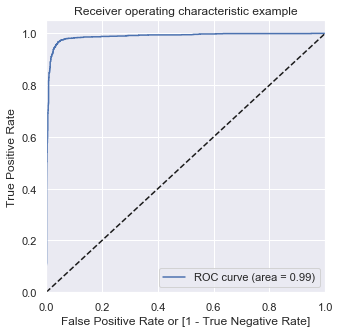

In [1649]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cutoff Point

In [1650]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          0        0.076220    3595    1    0    0    0    0    0    0    0   
1          1        0.997938     620    1    1    1    1    1    1    1    1   
2          1        0.996046    3520    1    1    1    1    1    1    1    1   
3          0        0.008288     753    1    0    0    0    0    0    0    0   
4          1        0.994168     288    1    1    1    1    1    1    1    1   

   0.8  0.9  
0    0    0  
1    1    1  
2    1    1  
3    0    0  
4    1    1

In [1651]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.495314  1.000000  0.000000
0.1   0.1  0.943764  0.981805  0.906429
0.2   0.2  0.956020  0.976710  0.935714
0.3   0.3  0.959986  0.970888  0.949286
0.4   0.4  0.960707  0.967249  0.954286
0.5   0.5  0.962149  0.966521  0.957857
0.6   0.6  0.959986  0.954148  0.965714
0.7   0.7  0.957823  0.949054  0.966429
0.8   0.8  0.956381  0.939592  0.972857
0.9   0.9  0.943764  0.903930  0.982857


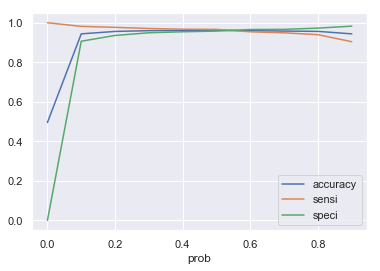

In [1652]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.57 is the optimum point to take it as a cutoff probability.

In [1653]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.57 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          0        0.076220    3595    1    0    0    0    0    0    0    0   
1          1        0.997938     620    1    1    1    1    1    1    1    1   
2          1        0.996046    3520    1    1    1    1    1    1    1    1   
3          0        0.008288     753    1    0    0    0    0    0    0    0   
4          1        0.994168     288    1    1    1    1    1    1    1    1   

   0.8  0.9  final_predicted  
0    0    0                0  
1    1    1                1  
2    1    1                1  
3    0    0                0  
4    1    1                1

In [1654]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9599855803893295

In [1655]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1347,   53],
       [  58, 1316]], dtype=int64)

In [1656]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1657]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9577874818049491

In [1658]:
# Let us calculate specificity
TN / float(TN+FP)

0.9621428571428572

In [1659]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03785714285714286


In [1660]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9612856099342586


In [1661]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9587188612099644


#### Precision and Recall

In [1662]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[1347,   53],
       [  58, 1316]], dtype=int64)

##### Precision
TP / TP + FP

In [1663]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9612856099342586

##### Recall
TP / TP + FN

In [1664]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9577874818049491

Using sklearn utilities for the same

In [1665]:
from sklearn.metrics import precision_score, recall_score

In [1666]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9612856099342586

In [1667]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9577874818049491

#### Precision and recall tradeoff

In [1668]:
from sklearn.metrics import precision_recall_curve

In [1669]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

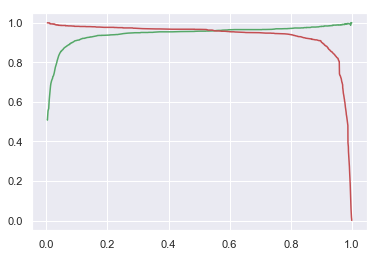

In [1670]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Again we get same cutoff around 0.57 to 0.58

#### Making predictions on the test set

In [1671]:
X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.transform(X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']])

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Isha\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [1672]:
X_test = X_test[col]
X_test.head()

Total_Time_Spent_on_Website  Lead_Origin_Landing Page Submission  \
1040                    -0.293825                                    1   
1010                     1.848258                                    1   
3355                    -1.063277                                    0   
2436                     1.220314                                    1   
354                      0.808171                                    1   

      Last_Activity_SMS Sent  Specialization_Supply Chain Management  \
1040                       0                                       0   
1010                       0                                       0   
3355                       0                                       0   
2436                       0                                       0   
354                        0                                       0   

      Tags_Busy  Tags_Closed by Horizzon  \
1040          0                        0   
1010          0                        0   
3355          0                        0   
2436          0                        0   
354           0                        1   

      Tags_In confusion whether part time or DLP  Tags_Lost to EINS  \
1040                                           0                  0   
1010                                           0                  0   
3355                                           0                  0   
2436                                           0                  0   
354                                            0                  0   

      Tags_Shall take in the next coming month  \
1040                                         0   
1010                                         0   
3355                                         0   
2436                                         0   
354                                          0   

      Tags_Will revert after reading the email  Last_Notable_Activity_Modified  
1040                                         0                               1  
1010                                         0                               1  
3355                                         1                               0  
2436                                         1                               0  
354                                          0                               1

In [1673]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [1674]:
y_test_pred = res.predict(X_test_sm)

In [1675]:
y_test_pred[:10]

1040    0.006228
1010    0.035664
3355    0.958684
2436    0.982791
354     0.993352
2239    0.993403
1773    0.988429
4070    0.995974
3671    0.005005
1520    0.976977
dtype: float64

In [1676]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1677]:
# Let's see the head
y_pred_1.head()

0
1040  0.006228
1010  0.035664
3355  0.958684
2436  0.982791
354   0.993352

In [1678]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1679]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [1680]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1681]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1682]:
y_pred_final.head()

Converted  CustID         0
0          0    1040  0.006228
1          0    1010  0.035664
2          1    3355  0.958684
3          1    2436  0.982791
4          1     354  0.993352

In [1683]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1684]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Converted_Prob'], axis=1)

In [1685]:
# Let's see the head of y_pred_final
y_pred_final.head()

CustID  Converted  Converted_Prob
0    1040          0        0.006228
1    1010          0        0.035664
2    3355          1        0.958684
3    2436          1        0.982791
4     354          1        0.993352

In [1686]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.57 else 0)

In [1687]:
y_pred_final.head()

CustID  Converted  Converted_Prob  final_predicted
0    1040          0        0.006228                0
1    1010          0        0.035664                0
2    3355          1        0.958684                1
3    2436          1        0.982791                1
4     354          1        0.993352                1

In [1688]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9629941126997477

In [1690]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[548,  22],
       [ 22, 597]], dtype=int64)

In [1691]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1692]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9644588045234249

In [1693]:
# Let us calculate specificity
TN / float(TN+FP)

0.9614035087719298